<img hfre>

# Data Dictionary
**Churn** = dict_churn_categories_numeric = {'Churn':{'No':0,'Yes':1}}
<br>
<br>
**Area** = dict_area_categories_numeric = {"Area":{'Urban':0, 'Suburban':1, 'Rural':2}}
<br>
<br>
**Education** = dict_education_categories_numeric = {'Education': {
    'Doctorate Degree':22,
    "Master's Degree":19,
    "Bachelor's Degree":16,
    "Associate's Degree":14, 
    'Some College, 1 or More Years, No Degree':13,
    'Some College, Less than 1 Year':13,
    'Professional School Degree':12, 
    'Regular High School Diploma':12,
    'GED or Alternative Credential':10,
    '9th Grade to 12th Grade, No Diploma':10,
    'Nursery School to 8th Grade':8,
    'No Schooling Completed':0, 
}}
<br>
<br>
**Marital** = dict_marital_categories_numeric = {'Marital':{
    'Never Married':0,
    'Married':1,
    'Widowed':2,
    'Separated':3,
    'Divorced':4}}    
<br>
<br>
**Contract** = dict_contract_categories_numeric = {'Contract': {'Month-to-month':0,'One year':1, 'Two Year':2}}
**Techie** = dict_techie_categories_numeric = {'Techie': {'No':0,'Yes':1,'unknown':2}}<br><br>
**Port_modem** = dict_port_modem_categories_numeric = {'Port_modem':{'No':0,'Yes':1}}<br><br>
**Tablet** = dict_tablet_categories_numeric = {'Tablet': {'No':0,'Yes':1}}<br><br>
**InternetService** = dict_internet_service_categories_numeric = {'InternetService': {'Fiber Optic':2, 'DSL':1, 'None':0}}<br><br>
**Phone** = dict_phone_categories_numeric = {'Phone':{'No':0, 'Yes':1, 'unknown':2}}<br><br>
**Multiple** = dict_multiple_categories_numeric = {'Multiple':{'No':0, 'Yes':1}}<br><br>
**OnlineSecurity** = dict_online_security_categories_numeric = {'OnlineSecurity':{'No':0,'Yes':1}}<br><br>
**DeviceProtection** = dict_online_backup_categories_numeric = {'OnlineBackup':{'No':0,'Yes':1}}<br><br>
**DeviceProtection** = dict_device_protection_categories_numeric = {'DeviceProtection':{'No':0,'Yes':1}}<br><br>
**TechSupport** = dict_tech_support_categories_numeric = {'TechSupport':{'No':0, 'Yes':1, 'unknown':2}}<br><br>
**StreamingTV** = dict_streamingtv_categories_numeric = {'StreamingTV':{'No':0, 'Yes':1}}<br><br>
**StreamingTV** = dict_streamingtv_categories_numeric = {'StreamingTV':{'No':0, 'Yes':1}}<br><br>
**StreamingMovies** = dict_streaming_movies_categories_numeric = {'StreamingMovies':{'No':0, 'Yes':1}}<br><br>
**PaperlessBilling** = dict_paperless_billing_categories_numeric = {'PaperlessBilling':{'No':0, 'Yes':1}}<br><br>

# Part I: Research Question
<br><br>

## A.  Describe one question or decision that you will address using the data set you chose. The summarized question or decision must be relevant to a realistic organizational need or situation.
<br><br>
### **How do we identify customers that might churn?**
<br><br>


## B.  Describe the variables in the data set and indicate the specific type of data being described. Use examples from the data set that support your claims.
<br><br>

In [2626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# %matplotlib inline
# %matplotlib notebook

In [2627]:
df = pd.read_csv('churn_raw_data.csv')

In [2628]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [2629]:
df.shape

(10000, 52)

In [2630]:
## add comment
pd.set_option('display.max_columns', None)

print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [2631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

# Description of Data Variables

 **Unnamed:** Is an int that is a 1 based index that I intend to change to a zero based index.
 
 **CaseOrder:** Is an int that preserves the order of the original file.              
 
 **Customer_id:** Is an string that contains letters and numbers that is a unique identifier.   
 
 
 **Interaction:** Is an string that is a unique id that is related to customer interactions with the company through transactions, technical support and customer sign up.            
 
 **City:** Is a string that contains the customers city of residence that is listed on the billing statement. Categorical.                 
 
 **State:** Is a string that contains the customers state of residence that is listed on the billing statement. Categorical.                
 
 **County:** Is a string that contains the customers state of residence that is listed on the billing statement. Categorical.               
 
 **Zip:** Is an int that contains the customers zip code of residence that is listed on the billing statement. Categorical.                  
 
 **Lat:** Is an int that lists the latitude of the customers residence that is listed on the billing statement. Categorical.
 
 **Lng:** Is an int that lists the longitude of the customers residence that is listed on the billing statement. Categorical.                  
 
 **Population:** Is an int that lists the population within a mile radius based on census data. Quantitative.
 
 
 **Area:**  Is a string that describes the area type based on census data. Either rural, urban or suburban. Categorical.
 
 **Timezone:** Is a strong of the time zone of the customer based on sign up information. Categorical.             
 
 **Job:** Is a string that represents the employment of the person being invoiced at sign up time. Categorical. 
 
 
 **Children:** Is an integer that represents the number of children in the household at the time of signup. Categorical.       
 
 **Age:** An int that represents the age of the customer at signup. Categorical.
 
 **Education:** A string of the highest degree the customer had earned at signup. Categorical.
 
 **Employment:** A string of the customers employment status at the time of signup. Categorical.            
 
 **Income:** An int representing the income of the customer at signup. Categorical.              
 
 **Marital:**  A string representing the marital status of the customer at signup. Categorical.              
 
 **Gender:**   A string representing the gender of the customer. Either male, female or non-binary. Categorical.             
 **Churn:** A string representing whether the customer has discontinued service within the last month. Categorical.
 
 **Outage_sec_perweek:** An int representing the number of seconds per week of system outages in the customers neighborhood.    
 
 **Email:** An int representing the number of emails sent to the customer in the last year via marketing or correspondence.                
 
 **Contacts:** An int representing the times a customer contacted customer support.             
 
 **Yearly_equip_failure:**  An int representing the number of times customers equipment failed and needed to be reset or replaced.
 
 **Techie:** Whether the customer considers themselves technically inclined per survey when they signed up. Categorical.       
 
 **Contract:** A string representing the term of the contract. Month-month, one-year and two-year. Categorical. 
 
 
 **Port_modem:** A string representing whether the customer has a portable modem or not. Categorical.            
 
 **Tablet:** A string representing whether the customer has a portable modem or not. Categorical.                
 
 **InternetService:** A string representing the customers type of internet service. DSL, fiber optic or none. Categorical.     
 
 **Phone:** A string representing whether the customer has a phone or not. Categorical.                 
 
 **Multiple:** A string representing whether the customer has multiple lines or not.Categorical.              
 
 **OnlineSecurity:** A string representing whether the customer has online security add-on. Categorical.        
 
 **OnlineBackup:** A string representing whether the customer has an online back-up add-on. Categorical.          
 
 **DeviceProtection:** A string representing whether the customer has device protection add-on. Categorical.      
 
 **TechSupport:** A string representing whether the customer has technical support add-on. Categorical.           
 
 **StreamingTV:** A string representing whether the customer has streaming TV. Categorical.           
 
 **StreamingMovies:** A string representing whether the customer has streaming movies. Categorical.
 
 **PaperlessBilling:**  A string representing whether the customer has paperless billing. Categorical.    
 
 **PaymentMethod:** A string representing the customers payment method and whether it is automatic or not. Categorical.         
 
 **Tenure:** An int representing the number of months the customer has stayed with the provider.                
 
 **MonthlyCharge:** An int that is the average monthly bill the customer receives.         
 
 **Bandwidth_GB_Year:** An int that represents the average GB used per year by the customer.   
 
 ### Eight question customer survey 1 being most important and 8 being least important
 
 **item1:** Timely responses                 
 
 **item2:** Timely Fixes                 
 
 **item3:** Timely Replacements                 
 
 **item4:** Reliability                  
 
 **item5:** Options                 
 
 **item6:** Respectful response                 
 
 **item7:** Courteous exchange                 
 
 **item8:** Evidence of active listening                
 

### Notes on Data:
#### Timezone is data based on sign up whereas other variables are based on the billing statement.
#### Analyzing customers who consider themselves techies and the amount of contacts to customer support.
#### Exploring issues with equipment and their effect on churn.
#### Exploring average amount of bill and its effect on churn.
#### Exploring average amount of bill, add-ons, and income/employment and its effect on churn.
#### Payment method used and its effect on churn.
#### The amount of contact that the company has with the customer and its effect on churn.
#### Analyzing the survey and the level of importance on the interaction with customer service and its effect on churn as well as how many times the customer has been in contact with the company. Might give insight to the level of customer service that customers are receiving.

# Part II: Data-Cleaning Plan
<br><br>

## C.  Explain the plan for cleaning the data by doing the following:


1.  Propose a plan that includes the relevant techniques and specific steps needed to identify anomalies in the data set.
<ul>
    <li>Changing 'unnamed' from a 1 based index to a zero based index and renaming it 'index'.
</li>
    <li>Changing misleading field value
</li>
    <li>Chang NaN values to the Median of the column.</li>
    <li>Re-expressing categorical data as numeric data
</li>
    <li>Standardizing the numeric fields
</li>
    <li>Identifying outliers
</li>
</ul>



<br><br>

2.  Justify your approach for assessing the quality of the data, include:
<p>Characteristics of the data being assessed</p>
<ul>
    <li>Completeness</li>
    <li>Validity</li>
    <li>Consistency</li>
    <li>Integrity</li>
    <li>Unique</li>
</ul>
<p>The completeness of the data. It not having missing values or incorrect data.</p>
<p>The validity of the data. The data is formatted correctly and the data is accurate.</p>
<p>The data is consistent in the ways that it is labeled and represented in a uniform way.</p>
<p>The data is correctly associated with other data that represents the proper meaning </p>
<p>All data is able to be identified and associated with the correct unique source</p>
<p>The data can be attached to a unique index that is associated with the relevant data and a unique customer id. After that the misleading fields values are renamed and replaced with values that are easily understood and relevant to the field. Next re-expressing categorical data as numeric data will allow us to assign meaning and context to data that would otherwise not be as usable. I will need to be careful to accurately re-express the data so as to not corrupt the data. Next standardizing the numeric fields will allow the data to be associated with a numeric value that indicates how many standard deviations the data is away from the mean of the data. With the standardization of the numeric fields I will be able to accurately identify outliers by determining their distance from the mean as well as the number of standard deviations away from the mean.</p>
<br><br>  

3.  Justify your selected programming language and any libraries and packages that will support the data-cleaning process.
#### Python with Pandas, Numpy, matplotlib.pyplot and using the magic inline code for graphs and plots.
##### I chose Python as I am already somewhat knowledgeable with python as it pertains to data science and it is a very good generalist language that has a ton of tools and support for data science and analytics through its libraries, packages and modules. It has a vast community that is active and always helpful whenever help is needed. There are thousands of resources for Python and data analytics should a problem arise that I do not know how to solve. 

<br>
<br>



4.  Provide the code you will use to identify the anomalies in the data.

<br><br>

## Changing unnamed to 'index' and making it a zero based index.

In [2632]:
df.rename(columns={('Unnamed: 0'): ('Index')}, inplace=True)
df.columns[0]

'Index'

In [2633]:
df.shape

(10000, 52)

In [2634]:
df.Index = pd.Series(range(0,10000))

In [2635]:
df.Index.head()

0    0
1    1
2    2
3    3
4    4
Name: Index, dtype: int64

In [2636]:
df.head()

,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


## Changing misleading field values

In [2637]:
all_columns = list(df.columns)
for column in all_columns:
    print(column, len(df[column].unique()))

Index 10000
CaseOrder 10000
Customer_id 10000
Interaction 10000
City 6058
State 52
County 1620
Zip 8583
Lat 8563
Lng 8655
Population 5933
Area 3
Timezone 25
Job 639
Children 12
Age 73
Education 12
Employment 5
Income 7507
Marital 5
Gender 3
Churn 2
Outage_sec_perweek 9993
Email 23
Contacts 8
Yearly_equip_failure 6
Techie 3
Contract 3
Port_modem 2
Tablet 2
InternetService 3
Phone 3
Multiple 2
OnlineSecurity 2
OnlineBackup 2
DeviceProtection 2
TechSupport 3
StreamingTV 2
StreamingMovies 2
PaperlessBilling 2
PaymentMethod 4
Tenure 9066
MonthlyCharge 9984
Bandwidth_GB_Year 8973
item1 7
item2 7
item3 8
item4 7
item5 7
item6 8
item7 7
item8 8


## List of data to investigate
### State has 52 but DC and PR are listed, not going to change.
### Timezone has 25 unique values even though there are only six time zones in the USA.
### Children has 12 different values
### Education has 12 values
### Employment has 5 values
### Marital status has 5 values 
### Techie has 3 where yes or no would suffice
### Internet service has 3 values where yes or no would suffice
### Phone has 3 values where yes or no would suffice
### Techsupport has 3 values where yes or no would suffice


In [2638]:
unique_values_list = ['Gender','Marital','Churn','Area','Timezone','Children','Education','Employment','Marital','Techie','InternetService','Phone','TechSupport']

In [2639]:
for value in unique_values_list:
    print(df[value].unique())

['Male' 'Female' 'Prefer not to answer']
['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
['No' 'Yes']
['Urban' 'Suburban' 'Rural']
['America/Sitka' 'America/Detroit' 'America/Los_Angeles' 'America/Chicago'
 'America/New_York' 'America/Puerto_Rico' 'America/Denver'
 'America/Menominee' 'America/Phoenix' 'America/Indiana/Indianapolis'
 'America/Boise' 'America/Kentucky/Louisville' 'Pacific/Honolulu'
 'America/Indiana/Petersburg' 'America/Nome' 'America/Anchorage'
 'America/Indiana/Knox' 'America/Juneau' 'America/Toronto'
 'America/Indiana/Winamac' 'America/Indiana/Vincennes'
 'America/North_Dakota/New_Salem' 'America/Indiana/Tell_City'
 'America/Indiana/Marengo' 'America/Ojinaga']
[nan  1.  4.  0.  3.  2.  7.  5.  9.  6. 10.  8.]
["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9t

In [2640]:
# checks the data frame for NaN and returns the total per column
df.isna().sum(axis=0)

Index                      0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

## Replacing NaN in columns with Median of column

In [2641]:
#All fields with a NaN that can be quantified with a mean will be changed to the median of the column
df.fillna(df.median(), inplace=True)

### Because median cannot be called on Techie, Phone, and TechSupport NaN fields will be set to 'Unknown'

In [2642]:
df.Techie.fillna('unknown', inplace=True)

In [2643]:
df.Phone.fillna('unknown', inplace=True)

In [2644]:
df.TechSupport.fillna('unknown', inplace=True)

In [2645]:
df.isna().sum(axis=0)

Index                   0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

<AxesSubplot:title={'center':'Histogram of Number of Children.'}, ylabel='Frequency'>

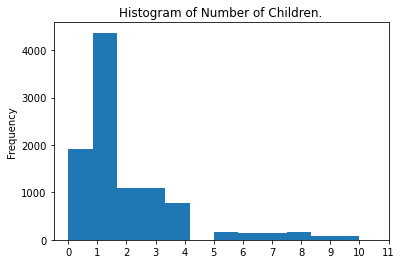

In [2646]:
df['Children'].plot(kind='hist', bins=12, xticks=range(0,12), title='Histogram of Number of Children.')

<AxesSubplot:title={'center':'Histogram of Age.'}, ylabel='Frequency'>

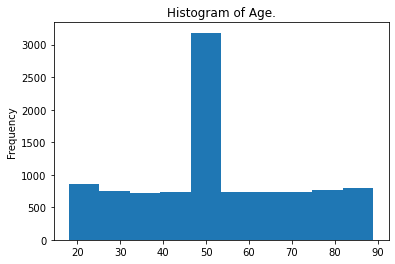

In [2647]:
df.Age.plot(kind='hist', bins=10, title='Histogram of Age.')

## Re-expressing the values of columns as numeric that have only yes no responses or categorical responses that can be re-expressed

### Identifying outliers

In [2648]:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
# df[(np.abs(stats.zscore(df['Churn'])) > 3)]


# State                   

In [2649]:
dict_state_categories_numeric = {'State':{
    'AK':0, 'MI':1, 'OR':2, 'CA':3, 'TX':4, 'GA':5, 'TN':6, 'OK':7, 'FL':8, 'OH':9, 'PA':10,
       'PR':11, 'IA':12, 'ME':13, 'IL':14, 'WI':15, 'NC':16, 'AL':17, 'NM':18, 'VT':19, 'MD':20, 'NY':21,
       'WA':22, 'CT':23, 'NJ':24, 'DC':25, 'ND':26, 'LA':27, 'NE':28, 'WV':29, 'AZ':30, 'MO':31, 'WY':32,
       'MT':33, 'VA':34, 'KY':35, 'MN':36, 'KS':37, 'MA':38, 'IN':39, 'SC':40, 'NH':41, 'DE':42, 'MS':43,
       'ID':44, 'AR':45, 'SD':46, 'CO':47, 'HI':48, 'UT':49, 'RI':50, 'NV':51
       }}

In [2650]:
df.replace(dict_state_categories_numeric, inplace=True)

In [2651]:
df.State.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

### Outliers

In [2652]:
len(df[(np.abs(stats.zscore(df['State'])) > 3)])


0

In [2653]:
df[(np.abs(stats.zscore(df['State'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# County                 

In [2654]:
len(df.County.unique())

1620

# Zip                     

In [2655]:
len(df[(np.abs(stats.zscore(df['Zip'])) > 3)])


0

In [2656]:
df[(np.abs(stats.zscore(df['State'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Lat                     

In [2657]:
len(df.Lat.unique())

8563

### Outliers

In [2658]:
len(df[(np.abs(stats.zscore(df['Lat'])) > 3)])


151

In [2659]:
df[(np.abs(stats.zscore(df['Lat'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,0,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,1.0,68.0,Master's Degree,Part Time,28561.990,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
11,11,12,E243720,c32b8522-d62a-49b1-a77a-e0534cb1378b,Corozal,11,Corozal,783,18.30410,-66.32847,33372,Rural,America/Puerto_Rico,Maintenance engineer,2.0,56.0,Bachelor's Degree,Full Time,18342.120,Married,Female,No,5.082821,17,1,1,No,Month-to-month,Yes,No,Fiber Optic,Yes,No,No,No,Yes,No,Yes,No,No,Electronic Check,36.196030,148.364087,1180.588788,4,4,3,4,4,4,3,4
286,286,287,K905632,9e7b66b1-95b1-46ba-a7d6-8bdb3f1f8427,Hauula,48,Honolulu,96717,21.55604,-157.89624,5148,Suburban,Pacific/Honolulu,"Scientist, forensic",2.0,60.0,"Some College, Less than 1 Year",Full Time,11250.710,Separated,Female,Yes,11.147257,16,1,1,No,Month-to-month,No,No,DSL,Yes,Yes,No,No,No,No,No,Yes,No,Bank Transfer(automatic),3.940297,160.159691,992.350148,3,3,5,5,2,4,4,5
298,298,299,O825386,ff4e5d18-ba80-4be8-a5c3-4f8b5d5dee66,Ocean View,48,Hawaii,96737,19.07026,-155.77587,4926,Rural,Pacific/Honolulu,Estate agent,4.0,82.0,Associate's Degree,Full Time,76066.770,Separated,Male,No,15.290915,12,2,1,No,Month-to-month,No,No,None,Yes,No,No,Yes,Yes,No,Yes,No,No,Electronic Check,18.355418,140.001027,1939.811149,3,3,4,4,4,3,5,5
359,359,360,K473134,b3b09fa7-cdde-44d0-9695-e70f6ce4201b,Kapaa,48,Kauai,96746,22.09268,-159.38128,19324,Suburban,Pacific/Honolulu,Clothing/textile technologist,1.0,53.0,Master's Degree,Unemployed,4180.220,Widowed,Female,No,11.813023,7,1,0,unknown,Two Year,Yes,No,None,unknown,No,Yes,No,No,No,Yes,Yes,No,Mailed Check,2.051069,177.676987,1040.034575,3,2,3,3,5,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,9827,9828,H794689,cedb1fa5-7c78-4ff5-b8be-23b91b4cf524,Anchorage,0,North Slope,99519,68.93806,-146.32360,469,Urban,America/Anchorage,Dentist,0.0,33.0,Professional School Degree,Full Time,33186.785,Widowed,Female,No,14.048140,14,1,1,unknown,Month-to-month,Yes,No,DSL,No,No,No,No,No,No,No,Yes,Yes,Bank Transfer(automatic),61.106760,127.558300,5631.450000,4,4,5,2,3,3,4,5
9873,9873,9874,J547555,0b892c49-09c3-4da5-b3a6-40f9c5844ba4,Circle,0,Yukon-Koyukuk,99733,65.79284,-144.18280,74,Suburban,America/Anchorage,Archivist,2.0,63.0,Nursery School to 8th Grade,Retired,33186.785,Divorced,Female,No,11.744760,9,1,1,No,Month-to-month,Yes,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check,36.196030,112.209800,3382.424000,2,2,4,3,4,2,2,2
9901,9901,9902,O774002,569131f4-71f4-4e59-9176-e4f8f7b7bbe1,Kaaawa,48,Honolulu,96730,21.54614,-157.85110,1359,Suburban,Pacific/Honolulu,"Lecturer, further education",9.0,72.0,Bachelor's Degree,Full Time,77625.490,Married,Female,Yes,8.157582,10,1,0,No,Month-to-month,No,No,DSL,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Electronic Check,67.254340,223.945600,6680.275000,4,4,4,4,3,4,3,4
9938,9938,9939,T295047,55a8bb6b-7bcf-441d-82be-3bb75042f2ed,Togiak,0,Dillingham,99678,59.33282,-160.10850,768,Urban,America/Anchorage,Adult guidance worker,1.0,19.0,Regular High School Diploma,Part Time,42381.630,Never Married,Female,Yes,10.195940,6,1,0,No,Month-to-month,No,No,None,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Mailed Check,58.10

# Lng                     

In [2660]:
len(df.Lng.unique())

8655

### Outliers

In [2661]:
len(df[(np.abs(stats.zscore(df['Lng'])) > 3)])


102

In [2662]:
df[(np.abs(stats.zscore(df['Lng'])) > 3)]
# outliers seem to be in Alaska and Hawaii

,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
286,286,287,K905632,9e7b66b1-95b1-46ba-a7d6-8bdb3f1f8427,Hauula,48,Honolulu,96717,21.55604,-157.89624,5148,Suburban,Pacific/Honolulu,"Scientist, forensic",2.0,60.0,"Some College, Less than 1 Year",Full Time,11250.710,Separated,Female,Yes,11.147257,16,1,1,No,Month-to-month,No,No,DSL,Yes,Yes,No,No,No,No,No,Yes,No,Bank Transfer(automatic),3.940297,160.159691,992.350148,3,3,5,5,2,4,4,5
298,298,299,O825386,ff4e5d18-ba80-4be8-a5c3-4f8b5d5dee66,Ocean View,48,Hawaii,96737,19.07026,-155.77587,4926,Rural,Pacific/Honolulu,Estate agent,4.0,82.0,Associate's Degree,Full Time,76066.770,Separated,Male,No,15.290915,12,2,1,No,Month-to-month,No,No,None,Yes,No,No,Yes,Yes,No,Yes,No,No,Electronic Check,18.355418,140.001027,1939.811149,3,3,4,4,4,3,5,5
359,359,360,K473134,b3b09fa7-cdde-44d0-9695-e70f6ce4201b,Kapaa,48,Kauai,96746,22.09268,-159.38128,19324,Suburban,Pacific/Honolulu,Clothing/textile technologist,1.0,53.0,Master's Degree,Unemployed,4180.220,Widowed,Female,No,11.813023,7,1,0,unknown,Two Year,Yes,No,None,unknown,No,Yes,No,No,No,Yes,Yes,No,Mailed Check,2.051069,177.676987,1040.034575,3,2,3,3,5,4,3,4
406,406,407,Z42949,75892f69-e4f5-45c3-b47b-7134f021a6bc,Jbphh,48,Honolulu,96853,21.33475,-157.93464,599,Urban,Pacific/Honolulu,"Lighting technician, broadcasting/film/video",2.0,53.0,Associate's Degree,Retired,37631.400,Married,Male,No,8.758562,13,3,0,No,Two Year,Yes,No,Fiber Optic,Yes,No,Yes,No,No,Yes,No,No,Yes,Electronic Check,32.307721,126.607736,2938.319116,3,2,3,4,4,3,4,3
421,421,422,P365450,61e00139-606f-4149-a380-b12ea67adeda,Honolulu,48,Honolulu,96814,21.29398,-157.84692,19527,Urban,Pacific/Honolulu,Trade union research officer,2.0,29.0,"9th Grade to 12th Grade, No Diploma",Full Time,24447.030,Separated,Female,No,4.301415,13,0,0,No,One year,Yes,No,DSL,Yes,No,No,Yes,Yes,No,No,Yes,No,Bank Transfer(automatic),3.238699,161.457552,1143.685617,3,3,2,4,2,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,9827,9828,H794689,cedb1fa5-7c78-4ff5-b8be-23b91b4cf524,Anchorage,0,North Slope,99519,68.93806,-146.32360,469,Urban,America/Anchorage,Dentist,0.0,33.0,Professional School Degree,Full Time,33186.785,Widowed,Female,No,14.048140,14,1,1,unknown,Month-to-month,Yes,No,DSL,No,No,No,No,No,No,No,Yes,Yes,Bank Transfer(automatic),61.106760,127.558300,5631.450000,4,4,5,2,3,3,4,5
9873,9873,9874,J547555,0b892c49-09c3-4da5-b3a6-40f9c5844ba4,Circle,0,Yukon-Koyukuk,99733,65.79284,-144.18280,74,Suburban,America/Anchorage,Archivist,2.0,63.0,Nursery School to 8th Grade,Retired,33186.785,Divorced,Female,No,11.744760,9,1,1,No,Month-to-month,Yes,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check,36.196030,112.209800,3382.424000,2,2,4,3,4,2,2,2
9901,9901,9902,O774002,569131f4-71f4-4e59-9176-e4f8f7b7bbe1,Kaaawa,48,Honolulu,96730,21.54614,-157.85110,1359,Suburban,Pacific/Honolulu,"Lecturer, further education",9.0,72.0,Bachelor's Degree,Full Time,77625.490,Married,Female,Yes,8.157582,10,1,0,No,Month-to-month,No,No,DSL,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Electronic Check,67.254340,223.945600,6680.275000,4,4,4,4,3,4,3,4
9938,9938,9939,T295047,55a8bb6b-7bcf-441d-82be-3bb75042f2ed,Togiak,0,Dillingham,99678,59.33282,-160.10850,768,Urban,America/Anchorage,Adult guidance worker,1.0,19.0,Regular High School Diploma,Part Time,42381.630,Never Married,Female,Yes,10.195940,6,1,0,No,Month-to-month,No,No,None,Yes,Yes,Yes,Yes,Yes,No,Yes

# Population              

In [2663]:
len(df.Population.unique())

5933

### Outliers

In [2664]:
len(df[(np.abs(stats.zscore(df['Population'])) > 3)])


219

In [2665]:
df[(np.abs(stats.zscore(df['Population'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
57,57,58,C101444,5ed9b266-29a0-489e-88e0-59f9a0b39e49,Goleta,3,Santa Barbara,93117,34.49127,-120.08222,58431,Rural,America/Los_Angeles,Professor Emeritus,1.0,33.0,Bachelor's Degree,Full Time,15690.250,Widowed,Female,No,11.310199,11,0,1,No,Two Year,No,No,None,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Mailed Check,6.732949,142.377023,958.139706,4,5,5,5,4,4,4,5
90,90,91,G491883,0319a159-cefc-4d57-804b-c5a16de84ca6,Greensboro,16,Guilford,27410,36.11785,-79.89432,55519,Rural,America/New_York,Chiropodist,0.0,75.0,"Some College, Less than 1 Year",Unemployed,58482.900,Separated,Female,Yes,7.832112,13,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Mailed Check,2.188919,192.008448,3382.424000,3,3,3,3,3,4,3,3
100,100,101,O967373,57582d0e-06d5-453f-934f-cd35554c860c,Birmingham,17,Shelby,35242,33.42521,-86.67144,55122,Urban,America/Chicago,Pharmacologist,1.0,69.0,Nursery School to 8th Grade,Full Time,58077.380,Separated,Male,Yes,10.822104,12,1,1,unknown,Month-to-month,No,No,None,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Credit Card (automatic),14.462882,222.799925,1806.135733,3,2,3,5,3,4,4,3
157,157,158,K265986,9f0486c9-e0fc-4762-8f35-e676fbefb689,League City,4,Galveston,77573,29.50205,-95.08652,86926,Rural,America/Chicago,Visual merchandiser,1.0,39.0,"9th Grade to 12th Grade, No Diploma",Full Time,33186.785,Divorced,Male,No,7.519193,9,2,1,Yes,Two Year,No,Yes,Fiber Optic,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Electronic Check,5.969967,175.495369,967.981914,4,5,4,4,3,3,3,5
203,203,204,K33780,10a165f2-6ce5-47ff-bec5-925b3d5eebf0,Chicago,14,Cook,60639,41.92056,-87.75603,90517,Suburban,America/Chicago,Merchant navy officer,3.0,83.0,Regular High School Diploma,Full Time,44223.580,Widowed,Female,No,8.339727,15,2,0,unknown,Month-to-month,Yes,No,None,Yes,No,No,Yes,No,No,Yes,No,No,Electronic Check,36.196030,128.445831,1430.761492,2,3,1,3,3,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,9647,9648,W662241,64d7344d-cec1-4558-83f3-aaad018c8433,Brooklyn,21,Kings,11238,40.67913,-73.96384,54540,Urban,America/New_York,"Engineer, site",0.0,39.0,Master's Degree,Full Time,29732.280,Separated,Female,Yes,6.051078,11,0,1,unknown,Month-to-month,No,No,None,Yes,No,No,No,Yes,No,Yes,Yes,No,Credit Card (automatic),66.508790,187.916500,3382.424000,3,3,3,4,4,4,3,3
9728,9728,9729,C304454,658084be-e583-42dd-b71b-df74dbb7d685,Mason,9,Warren,45040,39.35199,-84.31256,54507,Urban,America/New_York,Minerals surveyor,1.0,61.0,"9th Grade to 12th Grade, No Diploma",Full Time,24614.250,Divorced,Female,No,4.691535,17,2,0,No,Two Year,Yes,No,Fiber Optic,Yes,No,No,No,No,No,Yes,No,Yes,Bank Transfer(automatic),71.154680,136.147800,3382.424000,5,4,5,2,5,3,4,4
9905,9905,9906,T636629,bbe2f044-f023-4826-b154-797569131618,Kernersville,16,Forsyth,27284,36.11845,-80.07738,54413,Suburban,America/New_York,"Scientist, marine",1.0,30.0,Bachelor's Degree,Full Time,21246.030,Divorced,Male,No,5.712345,15,1,0,No,Month-to-month,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Credit Card (automatic),70.531170,140.954500,6599.192000,4,3,3,3,5,3,3,3
9987,9987,9988,C454652,c4cb88a8-dd44-46a4-84e7-891edf25cbaf,Chicago,14,Cook,60647,41.92068,-87.70167,87509,Urban,America/Chicago,"Editor, magazine features",1.0,53.0,"9th Grade to 12th Grade, No Diploma",Full Time,102629.600,Married,Female,No,7.231711,8,1,0,No,One year,No,Yes,None,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Elec

# Timezone               

In [2666]:
dict_timezone_categories_numeric = {'Timezone':{
    'America/Sitka':1,
    'America/Detroit':2,
    'America/Los_Angeles':3,
    'America/Chicago':4,
    'America/New_York':5,
    'America/Puerto_Rico':6,
    'America/Denver':7,
    'America/Menominee':8,
    'America/Phoenix':9,
    'America/Indiana/Indianapolis':10,
    'America/Boise':11,
    'America/Kentucky/Louisville':12,
    'Pacific/Honolulu':13,
    'America/Indiana/Petersburg':14,
    'America/Nome':15,
    'America/Anchorage':16,
    'America/Indiana/Knox':17,
    'America/Juneau':18,
    'America/Toronto':19,
    'America/Indiana/Winamac':20,
    'America/Indiana/Vincennes':21,
    'America/North_Dakota/New_Salem':22,
    'America/Indiana/Tell_City':23,
    'America/Indiana/Marengo':24,
    'America/Ojinaga':25}}

In [2667]:
df.replace(dict_timezone_categories_numeric, inplace = True)

In [2668]:
df.Timezone.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

### Outliers

In [2669]:
len(df[(np.abs(stats.zscore(df['Timezone'])) > 3)])


198

In [2670]:
df[(np.abs(stats.zscore(df['Timezone'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
164,164,165,T278739,2f84e063-6918-485b-8341-4c5e27d63de5,Hailey,44,Blaine,83333,43.56677,-114.31550,10398,Rural,11,Dealer,3.0,34.0,Regular High School Diploma,Unemployed,96382.760,Married,Male,Yes,8.685939,14,0,0,unknown,Two Year,Yes,No,None,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Mailed Check,16.003302,202.788174,3382.424000,2,2,3,4,1,4,4,4
181,181,182,Q991854,39b31972-2401-47ff-bc48-bd85a90dc113,Clarksville,39,Clark,47129,38.31387,-85.76896,19669,Urban,12,Land,4.0,59.0,"Some College, 1 or More Years, No Degree",Full Time,25519.910,Never Married,Prefer not to answer,Yes,12.586976,12,1,1,No,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Credit Card (automatic),23.007644,239.879902,2464.577489,4,3,3,4,3,4,4,3
286,286,287,K905632,9e7b66b1-95b1-46ba-a7d6-8bdb3f1f8427,Hauula,48,Honolulu,96717,21.55604,-157.89624,5148,Suburban,13,"Scientist, forensic",2.0,60.0,"Some College, Less than 1 Year",Full Time,11250.710,Separated,Female,Yes,11.147257,16,1,1,No,Month-to-month,No,No,DSL,Yes,Yes,No,No,No,No,No,Yes,No,Bank Transfer(automatic),3.940297,160.159691,992.350148,3,3,5,5,2,4,4,5
298,298,299,O825386,ff4e5d18-ba80-4be8-a5c3-4f8b5d5dee66,Ocean View,48,Hawaii,96737,19.07026,-155.77587,4926,Rural,13,Estate agent,4.0,82.0,Associate's Degree,Full Time,76066.770,Separated,Male,No,15.290915,12,2,1,No,Month-to-month,No,No,None,Yes,No,No,Yes,Yes,No,Yes,No,No,Electronic Check,18.355418,140.001027,1939.811149,3,3,4,4,4,3,5,5
334,334,335,O402306,c8ffb29f-7ee4-4883-8698-f6936607cd04,Salmon,44,Lemhi,83467,45.00975,-113.89910,5978,Suburban,11,"Therapist, music",9.0,53.0,Master's Degree,Part Time,33186.785,Never Married,Female,No,10.634560,11,0,0,No,One year,No,Yes,DSL,Yes,Yes,Yes,No,No,No,No,No,Yes,Electronic Check,8.701581,127.617949,1451.201108,3,2,2,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,9934,9935,T867814,3f5ccc97-8a12-4573-bf06-03a59e39eec0,Cannelton,39,Perry,47520,37.98604,-86.59334,2854,Rural,23,Haematologist,1.0,49.0,"Some College, 1 or More Years, No Degree",Unemployed,57886.920,Divorced,Male,No,10.797380,14,0,0,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Electronic Check,61.855740,206.784500,5511.103000,3,3,2,3,5,3,3,2
9938,9938,9939,T295047,55a8bb6b-7bcf-441d-82be-3bb75042f2ed,Togiak,0,Dillingham,99678,59.33282,-160.10850,768,Urban,16,Adult guidance worker,1.0,19.0,Regular High School Diploma,Part Time,42381.630,Never Married,Female,Yes,10.195940,6,1,0,No,Month-to-month,No,No,None,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Mailed Check,58.107240,245.629000,5672.754000,4,5,4,4,3,5,4,4
9939,9939,9940,I543072,e13ae28c-5a57-4788-9c21-463aa375adb7,Lewisville,44,Jefferson,83431,43.68884,-112.02970,786,Rural,11,"Psychologist, educational",2.0,53.0,"Some College, 1 or More Years, No Degree",Full Time,36876.810,Never Married,Male,Yes,10.136150,11,1,2,No,Month-to-month,No,Yes,None,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Electronic Check,62.325150,231.969700,3382.424000,3,2,2,3,4,3,3,4
9981,9981,9982,T786944,51066832-3277-40c0-b08d-404050cc1409,Newdale,44,Fremont,83436,43.85686,-111.47660,488,Urban,11,Barrister's clerk,1.0,53.0,Master's Degree,Full Time,61722.440,Divorced,Female,No,18.312340,9,1,1,No,Two Year,No,No,Fiber Optic,Yes,No,No,Yes,No,unknown,Yes,Yes,No,Mailed Check,61.489570,231.014900,5514.319000,4,4,5,1,4,5,4,4


# Job                     

In [2671]:
df.Job.unique()

array(['Environmental health practitioner', 'Programmer, multimedia',
       'Chief Financial Officer', 'Solicitor', 'Medical illustrator',
       'Chief Technology Officer', 'Surveyor, hydrographic',
       'Sales promotion account executive',
       'Teaching laboratory technician', 'Museum education officer',
       'Teacher, special educational needs', 'Maintenance engineer',
       'Engineer, broadcasting (operations)', 'Learning disability nurse',
       'Automotive engineer', 'Amenity horticulturist',
       'Applications developer', 'Immunologist', 'Engineer, electrical',
       'Broadcast presenter', 'Counsellor', 'Geophysical data processor',
       'Designer, multimedia', 'Event organiser',
       'Equality and diversity officer', 'Psychiatrist',
       'Surveyor, commercial/residential', 'Civil Service administrator',
       'Radiographer, diagnostic', 'Air traffic controller', 'Dietitian',
       'Therapist, occupational', 'Building services engineer',
       'Information 

# Employment              

In [2672]:
dict_employment_categories_numeric = {'Employment':{
    'Part Time':0,
    'Retired':1,
    'Student':2,
    'Full Time':3,
    'Unemployed':4
}}

In [2673]:
df.replace(dict_employment_categories_numeric, inplace = True)

### Outliers

In [2674]:
len(df[(np.abs(stats.zscore(df['Employment'])) > 3)])


0

In [2675]:
df[(np.abs(stats.zscore(df['Employment'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


In [2676]:
df.Employment.unique()

array([0, 1, 2, 3, 4])

# Income                  

In [2677]:
len(df.Income.unique())

7507

### Outliers

In [2678]:
len(df[(np.abs(stats.zscore(df['Income'])) > 3)])


193

In [2679]:
df[(np.abs(stats.zscore(df['Income'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
13,13,14,X44200,780992d3-d758-4152-aceb-5d59edda3d15,East Livermore,13,Androscoggin,4228,44.43256,-70.11501,0,Urban,5,Learning disability nurse,5.0,53.0,No Schooling Completed,1,115114.57,Separated,Female,No,6.568344,14,1,0,No,Two Year,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Bank Transfer(automatic),16.879220,185.659294,1948.694497,5,6,5,2,4,5,4,4
46,46,47,B609739,bb4a7c2d-6524-41d6-b2ed-f7511509ff5b,Peoria,14,Peoria,61606,40.69980,-89.61143,7870,Suburban,4,Broadcast presenter,1.0,23.0,Associate's Degree,1,132116.33,Divorced,Male,Yes,12.609107,11,1,0,No,Month-to-month,Yes,No,Fiber Optic,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Bank Transfer(automatic),22.257460,185.071940,2384.885909,4,4,5,2,2,4,3,3
92,92,93,K581313,87ec7c0f-2780-4909-9bf3-5369082eab90,Reading,1,Hillsdale,49274,41.83849,-84.76277,3499,Suburban,2,"Designer, television/film set",0.0,68.0,"Some College, Less than 1 Year",2,115510.46,Separated,Female,No,5.655483,3,1,0,No,Two Year,Yes,No,Fiber Optic,Yes,No,Yes,No,No,Yes,No,Yes,Yes,Electronic Check,3.273341,163.040404,443.984031,2,2,2,4,3,3,4,3
130,130,131,X645702,cfc79a87-f608-485d-86c9-cfce7db37a29,Dennison,9,Tuscarawas,44621,40.42752,-81.29587,4476,Rural,5,Corporate investment banker,0.0,47.0,Regular High School Diploma,3,125814.88,Divorced,Female,Yes,39.696851,10,0,1,No,Month-to-month,Yes,No,DSL,Yes,No,No,No,Yes,No,No,Yes,Yes,Mailed Check,6.085031,168.916463,1162.332926,3,3,4,2,4,4,3,2
186,186,187,F501848,b47490b5-a967-4f46-a76a-600552c4d141,Beckville,4,Panola,75631,32.24926,-94.45456,3151,Suburban,4,"Journalist, broadcasting",8.0,78.0,Regular High School Diploma,3,135727.71,Separated,Male,No,10.835332,14,0,0,unknown,Month-to-month,No,No,DSL,unknown,No,Yes,No,Yes,No,No,No,Yes,Mailed Check,8.081371,107.276898,1468.357421,3,3,3,3,5,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9726,9726,9727,B689525,be842d38-7058-4eb1-bddc-2bf1c73ffbb0,Oldhams,34,Westmoreland,22529,38.00965,-76.68586,155,Suburban,5,Medical technical officer,0.0,21.0,Regular High School Diploma,3,112773.20,Widowed,Male,No,6.392112,11,1,0,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,Yes,No,No,No,No,Yes,Electronic Check,66.424060,146.738800,6195.028000,3,2,4,3,3,4,4,4
9758,9758,9759,L933769,02d26ed1-c450-428f-8dd3-71403cd56cd7,Chunky,43,Newton,39323,32.35104,-88.92634,1475,Suburban,4,"Nurse, adult",0.0,87.0,Bachelor's Degree,3,113392.50,Widowed,Female,No,12.219250,14,0,0,No,Month-to-month,No,No,Fiber Optic,unknown,No,No,Yes,No,No,No,No,Yes,Mailed Check,66.537310,135.231400,5420.187000,3,3,2,4,3,2,3,4
9849,9849,9850,C406267,5fae818b-cdcb-452e-bb5a-c9dc04ed9383,Laporte,47,Larimer,80535,40.73342,-105.18350,2613,Urban,7,Dancer,1.0,53.0,"9th Grade to 12th Grade, No Diploma",2,134443.30,Married,Female,No,5.518844,11,0,0,No,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,No,No,No,No,No,No,No,Electronic Check,53.205570,143.253600,4516.883000,4,4,4,2,5,3,3,4
9876,9876,9877,T156561,34f05b13-dc84-4732-a9ac-2e2c68a2d625,Manchester,41,Hillsborough,3104,43.00934,-71.44146,32603,Suburban,5,Chief Technology Officer,1.0,85.0,Master's Degree,3,128468.00,Widowed,Female,No,11.736370,8,2,0,No,Two Year,Yes,No,Fiber Optic,No,No,No,No,No,No,No,Yes,Yes,Bank Transfer(automatic),63.597390,147.456100,5343.897000,3,4,4,4,4,4,5,3


# Outage_sec_perweek      

In [2680]:
len(df.Outage_sec_perweek.unique())

9993

### Outliers

In [2681]:
len(df[(np.abs(stats.zscore(df['Outage_sec_perweek'])) > 3)])


491

In [2682]:
df[(np.abs(stats.zscore(df['Outage_sec_perweek'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
28,28,29,J887250,a49a3cbf-182c-49f5-b15f-e124582d2c8f,Moretown,19,Washington,5660,44.24718,-72.74137,1716,Urban,5,Civil Service administrator,3.0,53.0,Regular High School Diploma,3,33186.785,Separated,Female,Yes,43.927052,13,2,0,Yes,One year,No,No,DSL,Yes,No,No,No,Yes,No,Yes,Yes,No,Bank Transfer(automatic),36.196030,230.623765,1259.415493,3,4,3,3,2,4,4,2
36,36,37,U790894,01fa4db5-6be5-47de-a3ac-53b95e5c44a8,Marlborough,23,Hartford,6447,41.63306,-72.45472,6394,Suburban,5,Market researcher,2.0,26.0,Regular High School Diploma,3,10114.810,Never Married,Female,Yes,44.725202,16,1,1,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Credit Card (automatic),3.312992,258.408165,897.591914,4,3,5,5,2,4,5,5
40,40,41,X711438,3c086e5c-e913-43b6-90d0-30b15b7cd37f,Mantoloking,24,Ocean,8738,40.02145,-74.06183,1164,Urban,5,Customer service manager,3.0,53.0,Regular High School Diploma,3,38211.370,Divorced,Female,No,38.905335,12,1,0,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,Yes,Yes,unknown,Yes,No,Yes,Mailed Check,9.179780,199.934126,3382.424000,5,2,3,3,3,5,4,4
61,61,62,O942919,176d7713-b919-41c3-badf-676dc1abbf07,Delavan,14,Tazewell,61734,40.37342,-89.52646,2765,Urban,4,Recruitment consultant,1.0,25.0,Bachelor's Degree,3,81831.490,Widowed,Male,No,39.883903,10,3,0,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Electronic Check,2.344875,225.294747,704.754041,3,4,3,2,3,4,2,4
130,130,131,X645702,cfc79a87-f608-485d-86c9-cfce7db37a29,Dennison,9,Tuscarawas,44621,40.42752,-81.29587,4476,Rural,5,Corporate investment banker,0.0,47.0,Regular High School Diploma,3,125814.880,Divorced,Female,Yes,39.696851,10,0,1,No,Month-to-month,Yes,No,DSL,Yes,No,No,No,Yes,No,No,Yes,Yes,Mailed Check,6.085031,168.916463,1162.332926,3,3,4,2,4,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9894,9894,9895,M593222,8e17fc2f-b4b9-43ed-81fd-f76425fc3cce,Valley View,10,Schuylkill,17983,40.64263,-76.54692,1482,Urban,5,Museum/gallery curator,1.0,83.0,Regular High School Diploma,3,48656.130,Widowed,Female,No,44.499730,12,1,0,unknown,Month-to-month,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Mailed Check,69.766740,206.587900,6435.761000,3,4,3,2,5,2,2,4
9895,9895,9896,Y827249,683654d1-0905-4992-a131-d9510c87f882,Pinson,17,Jefferson,35126,33.73147,-86.65417,20825,Suburban,4,Accommodation manager,0.0,24.0,GED or Alternative Credential,2,33430.290,Divorced,Female,No,40.684860,14,1,0,No,One year,Yes,Yes,None,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Electronic Check,65.715400,167.979000,5702.028000,4,4,4,3,3,4,3,5
9907,9907,9908,X106044,c504ace3-2fa9-4bf5-83cc-023d16e653cb,Valley Bend,29,Randolph,26293,38.78246,-79.93577,550,Urban,5,Professor Emeritus,1.0,26.0,Regular High School Diploma,2,33186.785,Divorced,Female,No,38.524730,12,1,1,unknown,Two Year,Yes,No,Fiber Optic,Yes,No,No,No,Yes,No,No,Yes,Yes,Electronic Check,44.541380,189.327200,3999.505000,4,3,4,4,5,3,3,3
9945,9945,9946,T260778,e8f84606-857d-40c4-aac1-31a235948601,Burchard,28,Pawnee,68323,40.14019,-96.38206,231,Urban,4,Secretary/administrator,0.0,89.0,Bachelor's Degree,1,33186.785,Married,Female,No,39.337010,14,3,1,No,Month-to-month,Yes,No,None,Yes,Yes,No,Yes,No,No,No,No,Yes,Bank Transfer(automatic),43.931210,162.301500,3633.285000,3,3,3,3,4,2,2,2


# Email                   

In [2683]:
len(df.Email.unique())

23

### Outliers

In [2684]:
len(df[(np.abs(stats.zscore(df['Email'])) > 3)])


12

In [2685]:
df[(np.abs(stats.zscore(df['Email'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
795,795,796,V397454,61317680-6fcb-46e3-a3ae-6dfb5d74652d,Readlyn,12,Bremer,50668,42.69069,-92.22652,1174,Urban,4,Hospital pharmacist,1.0,85.0,"Some College, 1 or More Years, No Degree",3,14824.710,Widowed,Male,Yes,7.996590,2,0,0,No,Month-to-month,No,Yes,Fiber Optic,unknown,No,No,Yes,No,unknown,Yes,No,Yes,Credit Card (automatic),6.284108,173.077144,829.270710,3,4,3,4,3,2,3,1
1152,1152,1153,B328912,0e6351f8-e91b-44c4-b4d1-1876ec047b91,Galena,31,Stone,65656,36.79505,-93.46672,4477,Suburban,4,Herbalist,1.0,53.0,"Some College, Less than 1 Year",3,33186.785,Widowed,Male,Yes,8.642425,2,0,1,No,Month-to-month,No,No,DSL,No,No,No,Yes,No,Yes,Yes,No,No,Mailed Check,14.871207,153.442884,2021.782055,1,3,1,3,4,3,2,2
1381,1381,1382,A626819,9f969c90-52dd-4575-8a73-b8f3a5d6baea,Anna,4,Collin,75409,33.35197,-96.52735,15379,Suburban,4,Theatre stage manager,3.0,82.0,Master's Degree,3,33168.880,Never Married,Male,No,11.574853,1,1,0,unknown,Month-to-month,Yes,No,DSL,Yes,No,No,No,No,Yes,Yes,No,Yes,Electronic Check,36.196030,130.540061,3192.755309,3,2,2,3,3,3,3,3
1399,1399,1400,P897691,97c7cf1b-1c78-4a7d-8c2c-cd528f65218d,Arlington,14,Bureau,61312,41.43573,-89.23293,511,Suburban,4,English as a foreign language teacher,0.0,84.0,Bachelor's Degree,2,43525.940,Divorced,Prefer not to answer,Yes,11.544648,2,2,2,No,Month-to-month,No,No,Fiber Optic,unknown,Yes,Yes,No,Yes,unknown,Yes,No,Yes,Bank Transfer(automatic),4.323214,185.970819,627.396266,4,4,4,2,3,4,4,4
1473,1473,1474,N49031,6d4104a2-bb45-4995-b0a5-680df77c70a8,Houston,4,Harris,77098,29.73487,-95.41529,13549,Rural,4,Lexicographer,1.0,32.0,Nursery School to 8th Grade,0,33186.785,Married,Female,Yes,11.390284,23,0,0,unknown,Month-to-month,Yes,Yes,Fiber Optic,unknown,Yes,No,Yes,Yes,Yes,No,No,Yes,Bank Transfer(automatic),10.442234,192.986294,1257.976073,5,4,5,3,3,5,5,3
1746,1746,1747,Z756585,3d6df3c6-daef-4920-90aa-50aa240d0125,Carthage,4,Panola,75633,32.12895,-94.27705,13553,Urban,4,Multimedia programmer,1.0,53.0,Master's Degree,0,56096.930,Divorced,Female,No,11.907143,22,0,0,No,One year,Yes,Yes,None,Yes,No,Yes,No,Yes,No,Yes,Yes,Yes,Bank Transfer(automatic),36.196030,189.523623,1606.847228,3,3,4,5,3,3,3,4
6320,6320,6321,R392539,4a979f3a-2bcd-4d61-9eb7-d8730e06b03d,Noblesville,39,Hamilton,46062,40.06175,-86.05543,35151,Suburban,10,IT trainer,0.0,57.0,Regular High School Diploma,1,31647.650,Divorced,Female,No,6.640022,1,0,1,Yes,Two Year,Yes,Yes,Fiber Optic,Yes,No,No,No,No,Yes,Yes,No,No,Electronic Check,54.015970,149.470600,4598.720000,3,4,3,3,3,2,3,3
7408,7408,7409,X451865,ba32dc79-a135-4360-b13d-ecbd6d989181,Trinway,9,Muskingum,43842,40.13683,-82.01275,330,Suburban,5,"Programmer, multimedia",1.0,49.0,"9th Grade to 12th Grade, No Diploma",0,33186.785,Widowed,Female,No,4.415241,2,2,0,No,One year,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,No,No,Mailed Check,54.844440,174.094100,4835.664000,5,5,4,4,3,5,7,5
8365,8365,8366,Q926339,f58d5572-c1f9-4092-b363-f07fbd2446c1,Powell,4,Navarro,75153,32.15027,-96.32857,397,Suburban,4,"Journalist, newspaper",1.0,47.0,No Schooling Completed,0,33186.785,Separated,Male,No,9.037105,1,2,0,No,Two Year,No,Yes,Fiber Optic,Yes,Yes,No,Yes,No,No,No,No,Yes,Electronic Check,69.756430,168.357900,6000.122000,4,3,4,2,5,3,4,4
8948,8948,8949,I301776,ebafa68f-e3b4-4dfc-96e8-46630f8ec00d,Glendale,3,Los Angeles,91204,34.13636,-118.26100,18720,Urban,3,"Producer, television/film/video",1.0,53.0,Master's Degree,3,28877.800,Separated,Male,Yes,8.230501,2,1,1,No,Month-to-month,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,El

# Contacts                

In [2686]:
len(df.Contacts.unique())

8

### Outliers

In [2687]:
len(df[(np.abs(stats.zscore(df['Contacts'])) > 3)])


165

In [2688]:
df[(np.abs(stats.zscore(df['Contacts'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
88,88,89,C73741,1ca2e70f-6207-4514-a8ce-e97244a56251,Waterbury,23,New Haven,6704,41.58650,-73.03305,25576,Rural,5,"Nurse, adult",1.0,53.0,Regular High School Diploma,3,33186.785,Separated,Female,Yes,8.926118,12,4,0,No,Month-to-month,Yes,No,DSL,unknown,No,No,No,No,No,Yes,Yes,Yes,Electronic Check,3.766630,187.621573,1393.202392,4,4,4,3,3,3,3,5
129,129,130,S985225,f3878f9d-fe73-4db7-9d66-de25fab169c1,Momence,14,Kankakee,60954,41.15338,-87.62902,5846,Urban,4,Osteopath,5.0,32.0,Regular High School Diploma,3,9515.640,Divorced,Male,Yes,7.469785,11,4,0,No,Month-to-month,No,No,None,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Mailed Check,4.568683,219.277619,3382.424000,2,1,2,4,3,5,3,1
187,187,188,Q971369,6ec3ca40-a3db-4a9d-b0c8-012950c949bd,Barnesville,10,Schuylkill,18214,40.79879,-76.08148,1919,Rural,5,"Engineer, manufacturing",1.0,53.0,Nursery School to 8th Grade,4,47726.250,Separated,Female,Yes,8.076760,8,5,0,No,Month-to-month,No,Yes,None,Yes,No,Yes,Yes,Yes,unknown,No,Yes,Yes,Credit Card (automatic),1.875430,152.404442,590.776580,1,3,2,3,4,3,3,3
205,205,206,Q279060,33a0892c-cd0b-4177-865c-b836af7a9a1c,Cosmos,36,Meeker,56228,44.93688,-94.67707,1003,Suburban,4,Occupational psychologist,0.0,25.0,"9th Grade to 12th Grade, No Diploma",1,30664.560,Separated,Female,Yes,9.937781,13,4,0,No,One year,No,No,Fiber Optic,Yes,Yes,No,No,No,No,Yes,Yes,No,Electronic Check,17.725935,240.472505,2059.200998,2,3,3,4,3,4,5,4
345,345,346,O511762,3a0cf6f8-3aa9-4262-b5a0-e9c7788cbac5,Arnoldsville,5,Oglethorpe,30619,33.85751,-83.24105,1277,Rural,5,"Producer, television/film/video",4.0,85.0,"9th Grade to 12th Grade, No Diploma",2,14980.500,Divorced,Female,Yes,9.869461,9,4,0,unknown,Month-to-month,Yes,No,DSL,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Bank Transfer(automatic),8.381516,232.889666,1718.600163,6,6,5,3,5,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,9799,9800,D32957,774a53fc-547a-4402-ad49-72abe33914b1,Athens,17,Limestone,35614,34.86542,-87.08385,7638,Rural,4,Chartered loss adjuster,4.0,71.0,Regular High School Diploma,2,33186.785,Separated,Male,No,10.642900,12,4,0,Yes,Month-to-month,Yes,No,DSL,Yes,No,No,No,Yes,Yes,No,Yes,No,Credit Card (automatic),54.419700,154.112200,5253.832000,3,3,2,5,3,3,4,2
9805,9805,9806,G824974,a0de52e5-421f-4cd1-b98e-9d1e39945f06,Hyampom,3,Trinity,96046,40.59969,-123.42900,165,Suburban,3,Bonds trader,0.0,45.0,Nursery School to 8th Grade,3,13219.000,Separated,Male,No,12.945710,13,4,0,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,Yes,Yes,Yes,Credit Card (automatic),36.196030,207.797200,5773.173000,3,4,2,2,3,3,4,3
9828,9828,9829,W814496,e576dc49-9d95-4f8e-9d77-734e901e7424,Donegal,10,Westmoreland,15628,40.10054,-79.37343,728,Rural,5,Community pharmacist,1.0,77.0,Regular High School Diploma,3,65565.990,Separated,Prefer not to answer,No,7.211660,11,4,0,unknown,Month-to-month,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,No,No,No,Credit Card (automatic),47.450440,159.899700,4486.583000,3,3,3,4,4,2,2,3
9923,9923,9924,I173343,0deb3f09-647c-467b-94c0-a621350323c8,Caliente,51,Lincoln,89008,37.27637,-114.54630,1324,Urban,3,Jewellery designer,4.0,38.0,Associate's Degree,3,33186.785,Never Married,Male,No,15.251760,10,4,0,No,Month-to-month,Yes,No,DSL,Yes,No,No,No,No,Yes,Yes,No,No,Electronic Check,58.135800,132.042700,5582.271000,4,3,4,2,4,4,4,2


# Yearly_equip_failure    

In [2689]:
len(df.Yearly_equip_failure.unique())

6

### Outliers

In [2690]:
len(df[(np.abs(stats.zscore(df['Yearly_equip_failure'])) > 3)])


94

In [2691]:
df[(np.abs(stats.zscore(df['Yearly_equip_failure'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
8,8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,8,Osceola,34771,28.27646,-81.16273,17351,Suburban,5,Teaching laboratory technician,2.0,49.0,"Some College, Less than 1 Year",3,58634.510,Separated,Prefer not to answer,No,6.637259,20,2,3,unknown,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4
20,20,21,X325271,ebf7fbd7-9f65-48d8-8f82-b7b7fd4f3412,Kaneville,14,Kane,60144,41.83594,-88.52060,69,Rural,4,Counsellor,4.0,53.0,Nursery School to 8th Grade,1,39624.210,Never Married,Male,No,12.186698,14,0,3,unknown,Month-to-month,No,No,Fiber Optic,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Bank Transfer(automatic),20.453910,185.096264,2330.319383,2,3,3,2,4,2,3,3
171,171,172,P954849,7ec593ca-82bd-4a03-8359-ab20212e3ce7,Valley Stream,21,Nassau,11580,40.67495,-73.70356,43714,Suburban,5,"Geologist, wellsite",1.0,31.0,"Some College, 1 or More Years, No Degree",3,35321.460,Married,Male,Yes,11.711353,11,0,3,No,Month-to-month,Yes,No,Fiber Optic,Yes,No,No,No,Yes,No,No,Yes,No,Credit Card (automatic),36.196030,161.083510,1522.289512,2,3,3,5,4,3,2,3
592,592,593,X987521,c09f56b6-1b05-46ea-b33c-8d9fed4dea5c,Westerville,9,Franklin,43081,40.11064,-82.89134,61572,Suburban,5,"Surveyor, building",2.0,80.0,"9th Grade to 12th Grade, No Diploma",3,33186.785,Married,Male,Yes,10.281801,10,0,3,No,Month-to-month,Yes,Yes,None,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Electronic Check,15.379904,206.930518,1795.270512,2,3,2,3,4,2,1,3
621,621,622,S636055,bba47549-f3bb-46d7-b4f3-1c4effa75b3b,Marlton,24,Burlington,8053,39.86049,-74.89466,45193,Rural,5,Energy manager,1.0,43.0,"9th Grade to 12th Grade, No Diploma",3,14900.460,Divorced,Female,Yes,10.993395,10,2,3,No,Month-to-month,Yes,No,None,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Credit Card (automatic),1.445148,163.417357,3382.424000,3,2,3,3,4,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9623,9623,9624,Q831134,5b4ad141-b338-4638-9b10-1d0e2ce826b5,Granada Hills,3,Los Angeles,91344,34.29392,-118.50750,53266,Urban,3,"Engineer, communications",10.0,79.0,Doctorate Degree,3,42222.250,Married,Female,No,10.029420,14,1,4,unknown,Month-to-month,Yes,No,DSL,Yes,Yes,No,No,No,Yes,No,Yes,No,Mailed Check,68.033240,173.170700,6432.294000,4,5,5,3,5,3,4,2
9674,9674,9675,H712105,0a489672-b274-4fb8-9e82-9705e4bd9933,Jackson,1,Jackson,49203,42.22151,-84.40110,38659,Suburban,2,"Journalist, magazine",1.0,53.0,Bachelor's Degree,1,33186.785,Never Married,Male,No,6.345157,10,3,3,No,Month-to-month,No,No,None,No,Yes,No,Yes,Yes,Yes,No,Yes,No,Credit Card (automatic),57.362980,194.028400,5222.665000,6,3,4,4,2,3,5,3
9763,9763,9764,A472924,68f06d83-dca3-473e-9543-3246da5c941d,Snelling,3,Merced,95369,37.53346,-120.43170,990,Urban,3,Financial manager,1.0,53.0,"9th Grade to 12th Grade, No Diploma",4,33186.785,Married,Female,No,10.145060,8,0,4,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,No,No,unknown,Yes,No,No,Credit Card (automatic),55.072770,172.004700,4849.092000,3,3,3,2,5,5,4,4
9769,9769,9770,W133136,24a71b97-d47a-4ab6-b0a0-3c3cf30257dd,Buffalo,21,Erie,14207,42.95167,-78.89778,23808,Suburban,5,Manufacturing engineer,0.0,83.0,Regular High School Diploma,1,33186.785,Married,Male,No,8.338162,13,2,3,No,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Mailed Check,65.037290,275.342100,5890.998000,2,2,2,5,2,4,3,3


# Tenure                  

In [2692]:
len(df.Tenure.unique())

9065

### Outliers

In [2693]:
len(df[(np.abs(stats.zscore(df['Tenure'])) > 3)])


0

In [2694]:
df[(np.abs(stats.zscore(df['Tenure'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# MonthlyCharge           

In [2695]:
len(df.MonthlyCharge.unique())

9984

### Outliers

In [2696]:
len(df[(np.abs(stats.zscore(df['MonthlyCharge'])) > 3)])


3

In [2697]:
df[(np.abs(stats.zscore(df['MonthlyCharge'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
927,927,928,O479736,fa6578cd-243a-498d-9a20-8fd5a133c982,Mendon,49,Cache,84325,41.72579,-111.99279,2358,Rural,7,Visual merchandiser,1.0,53.0,Nursery School to 8th Grade,3,7598.570,Divorced,Male,Yes,37.018121,17,0,0,No,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Bank Transfer(automatic),6.434281,307.528124,1482.558282,4,4,4,5,2,4,2,2
3746,3746,3747,Q642279,869dcfbe-d65e-45f7-844c-736ae3426677,Point Baker,0,Prince of Wales-Hyder,99927,56.25100,-133.37570,38,Rural,1,Herpetologist,0.0,53.0,"9th Grade to 12th Grade, No Diploma",3,33186.785,Never Married,Female,Yes,40.421970,18,1,0,No,Month-to-month,No,No,Fiber Optic,unknown,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Credit Card (automatic),5.962119,315.878600,1288.595000,4,3,5,3,4,4,4,4
4700,4700,4701,I250439,c9a55402-8498-4b7f-97ad-7f2bee5eece3,Inkom,44,Bannock,83245,42.81817,-112.22040,2144,Urban,11,Dramatherapist,4.0,32.0,Bachelor's Degree,3,52866.310,Separated,Male,Yes,38.814030,12,0,0,Yes,Month-to-month,Yes,Yes,Fiber Optic,Yes,Yes,Yes,Yes,Yes,unknown,Yes,Yes,Yes,Mailed Check,4.581601,306.268000,1383.764000,2,3,3,3,4,1,2,3


# Bandwidth_GB_Year       

In [2698]:
len(df.Bandwidth_GB_Year.unique())

8972

### Outliers

In [2699]:
len(df[(np.abs(stats.zscore(df['Bandwidth_GB_Year'])) > 3)])


0

In [2700]:
df[(np.abs(stats.zscore(df['Bandwidth_GB_Year'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# item1                   

In [2701]:
len(df.item1.unique())

7

### Outliers

In [2702]:
len(df[(np.abs(stats.zscore(df['item1'])) > 3)])


19

In [2703]:
df[(np.abs(stats.zscore(df['item1'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
397,397,398,F902621,5d12a098-4b9f-41e0-8f0e-6e06c9bfcf0c,Center Line,1,Macomb,48015,42.48045,-83.02719,8303,Urban,2,Lawyer,1.0,73.0,"9th Grade to 12th Grade, No Diploma",2,37149.400,Married,Male,No,11.997862,17,0,0,unknown,Two Year,No,No,None,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Mailed Check,9.797427,144.015893,1250.944780,7,6,5,5,2,6,4,4
1510,1510,1511,J673680,d73d58f4-49fc-47d7-a056-24b252e85406,Freedom,41,Carroll,3836,43.82621,-71.07147,1353,Urban,5,"Embryologist, clinical",3.0,31.0,Regular High School Diploma,3,34179.490,Married,Female,No,8.676016,14,1,0,Yes,Month-to-month,Yes,No,None,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Electronic Check,36.196030,174.771885,2138.939088,7,6,6,4,4,5,6,5
2134,2134,2135,V812066,2f7ce16a-d6b7-4a8c-890a-ccd72cd08594,Biloxi,43,Harrison,39532,30.49403,-88.96513,37122,Rural,4,Private music teacher,4.0,31.0,Master's Degree,3,14048.760,Married,Male,Yes,6.770427,13,1,1,unknown,Two Year,No,No,None,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Bank Transfer(automatic),9.637159,203.242302,1639.666431,7,6,6,6,4,4,5,6
2264,2264,2265,D538894,cbd35843-fae7-4eb9-814b-9b4b6480b774,South Haven,36,Meeker,55382,45.30638,-94.20457,3649,Urban,4,Artist,4.0,63.0,Regular High School Diploma,0,33186.785,Divorced,Female,No,6.567674,17,1,0,No,Two Year,No,No,None,Yes,No,No,No,No,Yes,No,Yes,Yes,Bank Transfer(automatic),4.719731,127.076456,626.826682,7,6,6,2,5,4,3,4
2558,2558,2559,J512358,7cf4b073-c332-4398-8ad8-9631e877ff57,Charlestown,20,Cecil,21914,39.57307,-75.98179,771,Urban,5,Theatre stage manager,3.0,46.0,Associate's Degree,3,49535.290,Married,Female,Yes,12.692213,18,0,0,unknown,Month-to-month,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Credit Card (automatic),6.905862,199.118881,3382.424000,7,7,6,4,4,4,4,5
2740,2740,2741,A784083,058af548-e940-49bf-b14e-51311125852d,Dewart,10,Northumberland,17730,41.11040,-76.87848,200,Suburban,5,Chief Marketing Officer,2.0,72.0,Associate's Degree,4,20465.980,Widowed,Female,Yes,36.788030,10,1,1,No,Month-to-month,No,No,None,Yes,No,No,No,No,Yes,No,Yes,Yes,Credit Card (automatic),36.196030,154.154123,825.648553,7,4,6,2,5,5,4,4
4483,4483,4484,E631245,a297b5c2-671a-46e3-98c8-279002c85376,Big Springs,28,Deuel,69122,41.13007,-102.10260,729,Suburban,7,Heritage manager,1.0,88.0,Regular High School Diploma,3,14821.760,Never Married,Female,No,40.312860,13,3,0,No,Two Year,No,No,Fiber Optic,Yes,No,Yes,No,Yes,unknown,Yes,No,No,Bank Transfer(automatic),7.326372,181.650600,858.248300,7,5,5,4,3,5,3,6
4751,4751,4752,E446263,5efc490e-942c-4d1e-b061-cd7a3a896272,Moclips,22,Grays Harbor,98562,47.23854,-124.20360,0,Rural,3,Chief Strategy Officer,0.0,83.0,Nursery School to 8th Grade,3,19271.850,Widowed,Female,Yes,14.334590,15,0,0,Yes,Month-to-month,Yes,Yes,Fiber Optic,Yes,Yes,No,No,No,No,No,No,Yes,Credit Card (automatic),5.792269,147.070100,433.944200,7,6,6,4,3,4,4,5
5128,5128,5129,F251167,829a18b3-2649-4324-aecb-85f777148eec,Wheaton,36,Traverse,56296,45.82867,-96.46747,1948,Suburban,4,Publishing rights manager,3.0,53.0,Bachelor's Degree,3,33186.785,Separated,Female,No,6.290379,13,1,0,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,Yes,Yes,No,No,Yes,Mailed Check,70.522350,137.058200,5962.412000,7,6,4,3,3,4,5,5
5447,5447,5448,X603267,0a2c603f-271e-4b35-a81f-ea9d29a353d1,Harwich Port,38,Barnstable,2646,41.67079,-70.07194,1868,Suburban,5,Facilities manager,0.0,53.0,"Some College, Less than 1 Year",3,54073.620,Separated,Female,No,10.394440,11,1,0,Yes,Month-to-month,Yes,No,Fiber Optic,No,Yes,No,No,Yes,Yes,Yes,No,No,Electronic Check,61.339970,194.210800

# item2                   

In [2704]:
len(df.item2.unique())

7

### Outliers

In [2705]:
len(df[(np.abs(stats.zscore(df['item2'])) > 3)])


13

In [2706]:
df[(np.abs(stats.zscore(df['item2'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
2356,2356,2357,E856185,d3d47cd5-be0f-4e12-9a43-a1f3e70ab0cb,Denmark,6,Madison,38391,35.55104,-88.99404,1090,Suburban,4,"Surveyor, building",4.0,49.0,"9th Grade to 12th Grade, No Diploma",1,64697.570,Separated,Female,No,7.515230,15,1,0,No,Two Year,No,No,None,Yes,Yes,No,No,No,Yes,No,No,Yes,Bank Transfer(automatic),36.196030,123.182569,3382.424000,5,7,4,3,4,5,3,3
2558,2558,2559,J512358,7cf4b073-c332-4398-8ad8-9631e877ff57,Charlestown,20,Cecil,21914,39.57307,-75.98179,771,Urban,5,Theatre stage manager,3.0,46.0,Associate's Degree,3,49535.290,Married,Female,Yes,12.692213,18,0,0,unknown,Month-to-month,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Credit Card (automatic),6.905862,199.118881,3382.424000,7,7,6,4,4,4,4,5
2743,2743,2744,C707263,4a130e38-a425-47e2-ba31-5f32dbbabdcf,Horsham,10,Montgomery,19044,40.18607,-75.15289,16350,Suburban,5,Ecologist,1.0,24.0,Regular High School Diploma,0,24700.600,Married,Prefer not to answer,No,7.917042,12,0,0,unknown,Two Year,No,No,Fiber Optic,Yes,No,Yes,No,No,Yes,Yes,No,No,Mailed Check,11.840824,154.220803,1318.102379,6,7,7,3,4,4,4,4
5965,5965,5966,L850408,75632b89-0f58-4cfc-ae31-0254b37e9fe3,San Antonio,4,Bexar,78264,29.18832,-98.50115,11174,Suburban,4,Production manager,1.0,53.0,Nursery School to 8th Grade,0,32064.160,Divorced,Male,No,2.997742,8,1,2,No,One year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Bank Transfer(automatic),66.693930,277.728700,6413.547000,6,7,6,4,3,6,5,5
6615,6615,6616,S388590,c7105a1f-84a3-44b9-8519-db8618311cc6,Harrisville,1,Alcona,48740,44.66021,-83.37952,2353,Suburban,2,Geoscientist,1.0,43.0,Bachelor's Degree,2,37634.230,Married,Female,No,9.331612,16,0,0,unknown,Two Year,Yes,No,Fiber Optic,Yes,Yes,No,Yes,No,No,No,No,Yes,Electronic Check,43.209290,166.670400,3755.734000,6,7,6,4,5,5,5,4
7055,7055,7056,R501652,9a7393fc-f17e-4c92-b478-2a21a071ec45,Lexa,45,Phillips,72355,34.55033,-90.76415,2285,Suburban,4,Fine artist,0.0,88.0,"Some College, Less than 1 Year",1,44678.290,Married,Female,No,4.246357,10,0,1,No,One year,No,Yes,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Electronic Check,54.445320,214.501400,4818.097000,6,7,5,4,4,4,3,3
7167,7167,7168,Z600850,3e023ed4-b555-4fe8-a9d7-fb524df1f16c,Liberty,39,Union,47353,39.62773,-84.91944,5553,Urban,10,"Teacher, secondary school",8.0,26.0,Associate's Degree,3,58434.600,Widowed,Female,No,7.395612,10,1,0,unknown,Month-to-month,No,No,None,No,No,No,No,Yes,Yes,Yes,No,Yes,Mailed Check,63.967480,130.461800,5847.187000,6,7,5,1,5,3,3,5
7296,7296,7297,E927955,475cdf7c-a63c-4c0b-9ffa-daab351817b0,Center Sandwich,41,Carroll,3227,43.82773,-71.46772,979,Urban,5,"Designer, graphic",2.0,41.0,Bachelor's Degree,0,43271.390,Married,Female,No,6.273080,11,1,0,No,Month-to-month,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Bank Transfer(automatic),59.538250,222.442500,5934.180000,7,7,8,4,5,4,5,3
7564,7564,7565,X863186,eb952845-ffa2-48ea-a3d1-236e6d6e95fe,Troy,1,Oakland,48098,42.59907,-83.17888,19237,Rural,2,Musician,1.0,55.0,Regular High School Diploma,0,66342.210,Married,Male,No,9.378836,10,0,0,No,One year,Yes,Yes,DSL,unknown,No,No,No,Yes,unknown,No,Yes,Yes,Credit Card (automatic),66.599120,138.800400,6176.784000,6,7,6,3,3,6,6,5
8011,8011,8012,R457980,64f3841f-90e3-435d-a8c7-49f201018077,Craftsbury Common,19,Orleans,5827,44.68112,-72.35814,365,Urban,5,Herpetologist,0.0,80.0,"Some College, 1 or More Years, No Degree",2,33186.785,Divorced,Male,Yes,15.736290,15,1,0,Yes,Month-to-month,No,Yes,None,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Electronic Check,65.979910,198.867100,5897.274

# item3                   

In [2707]:
len(df.item3.unique())

8

### Outliers

In [2708]:
len(df[(np.abs(stats.zscore(df['item3'])) > 3)])


13

In [2709]:
df[(np.abs(stats.zscore(df['item3'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
944,944,945,O632318,c5c65a76-587e-4eaa-ad7f-0c6fdbff704f,Galva,37,McPherson,67443,38.38074,-97.52213,1655,Rural,4,Building control surveyor,1.0,54.0,Regular High School Diploma,3,17773.110,Separated,Female,Yes,10.896366,12,0,0,unknown,Two Year,No,Yes,DSL,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Mailed Check,10.033642,211.154784,1830.933610,5,5,7,3,4,4,5,4
1813,1813,1814,B954936,46d5994e-c8f3-45d8-b49c-861f8bacdb3f,Ralston,32,Park,82440,44.71983,-108.86398,201,Suburban,7,IT technical support officer,0.0,53.0,"Some College, Less than 1 Year",3,33186.785,Married,Male,No,6.647996,10,1,1,No,One year,No,No,None,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Electronic Check,12.705833,219.352867,1780.064534,6,5,7,5,3,4,4,5
2743,2743,2744,C707263,4a130e38-a425-47e2-ba31-5f32dbbabdcf,Horsham,10,Montgomery,19044,40.18607,-75.15289,16350,Suburban,5,Ecologist,1.0,24.0,Regular High School Diploma,0,24700.600,Married,Prefer not to answer,No,7.917042,12,0,0,unknown,Two Year,No,No,Fiber Optic,Yes,No,Yes,No,No,Yes,Yes,No,No,Mailed Check,11.840824,154.220803,1318.102379,6,7,7,3,4,4,4,4
3578,3578,3579,L40018,d71abc28-1ded-45e9-92d5-a5cd1149f6f2,Irmo,40,Richland,29063,34.14018,-81.20556,39090,Rural,5,Accommodation manager,2.0,53.0,Associate's Degree,0,15584.370,Married,Male,Yes,9.928666,15,3,0,unknown,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,Yes,Yes,Yes,No,Credit Card (automatic),36.196030,219.317400,1280.601000,5,6,7,3,2,5,4,4
4137,4137,4138,E548977,c3ee77ff-d8dd-4416-bae5-e82c099cac22,Rich Creek,34,Giles,24147,37.40047,-80.82591,1264,Suburban,5,Oncologist,1.0,24.0,No Schooling Completed,3,28683.490,Widowed,Male,No,9.556096,12,0,0,unknown,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,No,No,No,No,No,No,No,Electronic Check,10.057660,144.166200,1151.520000,6,5,7,5,2,5,5,5
5134,5134,5135,E572839,c721c4cb-2536-4a83-9c2c-96d77ec37a24,Leopold,39,Perry,47551,38.12333,-86.56241,923,Suburban,23,"Therapist, speech and language",2.0,53.0,Professional School Degree,4,24149.710,Never Married,Female,No,8.669561,13,1,0,No,Month-to-month,No,No,DSL,No,Yes,No,Yes,Yes,Yes,No,No,Yes,Credit Card (automatic),69.913060,172.912800,6343.108000,4,5,7,4,1,4,6,3
5527,5527,5528,O212620,b229ffa4-2721-4578-8db3-b2ec88c2a2d7,Woodward,10,Centre,16882,40.91244,-77.32347,467,Urban,5,"Production assistant, television",0.0,87.0,Regular High School Diploma,3,34209.190,Never Married,Male,No,5.608041,14,1,0,unknown,Two Year,Yes,Yes,Fiber Optic,Yes,Yes,No,No,No,No,No,No,Yes,Electronic Check,65.648140,144.154900,5407.576000,6,5,7,3,4,4,4,4
7296,7296,7297,E927955,475cdf7c-a63c-4c0b-9ffa-daab351817b0,Center Sandwich,41,Carroll,3227,43.82773,-71.46772,979,Urban,5,"Designer, graphic",2.0,41.0,Bachelor's Degree,0,43271.390,Married,Female,No,6.273080,11,1,0,No,Month-to-month,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Bank Transfer(automatic),59.538250,222.442500,5934.180000,7,7,8,4,5,4,5,3
8244,8244,8245,M494039,f26fa725-fc5b-4677-9603-e7cb469abb51,Orleans,39,Orange,47452,38.64141,-86.42254,5115,Rural,10,"Programmer, applications",3.0,45.0,Bachelor's Degree,4,12616.300,Never Married,Female,No,9.451394,13,0,0,unknown,Two Year,Yes,Yes,Fiber Optic,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Mailed Check,70.897380,274.381800,6621.872000,6,7,7,4,5,7,4,3
8764,8764,8765,E556319,51f5605b-f608-4b6c-a2e7-3e3d1442e9e7,Roy,22,Pierce,98580,46.99630,-122.51610,11195,Rural,3,"Optician, dispensing",1.0,44.0,Master's Degree,2,12558.050,Never Married,Male,No,10.307480,17,0,1,unknown,One year,No,No,Fiber Optic,Yes,No,No,No,Yes,No,Yes,Yes,No,Bank Transfer(automatic)

# item4                   

In [2710]:
len(df.item4.unique())

7

### Outliers

In [2711]:
len(df[(np.abs(stats.zscore(df['item4'])) > 3)])


9

In [2712]:
df[(np.abs(stats.zscore(df['item4'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
10,10,11,J980369,89490f4b-765f-431a-b302-580aae7db71a,Little Meadows,10,Susquehanna,18830,41.95142,-76.10744,555,Urban,5,"Teacher, special educational needs",7.0,23.0,Regular High School Diploma,3,33186.785,Separated,Female,No,11.835113,9,0,2,No,Month-to-month,No,No,DSL,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Mailed Check,19.267262,177.451599,2728.767869,4,4,4,7,3,3,3,4
533,533,534,N818917,ee07de1d-9387-4337-97c4-50f46aad5955,Johnson,28,Nemaha,68378,40.38339,-96.02534,722,Urban,4,"Scientist, water quality",1.0,53.0,Master's Degree,4,24202.120,Divorced,Prefer not to answer,No,11.570144,14,0,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Electronic Check,8.878537,198.704562,1136.118286,2,3,3,7,1,3,4,3
559,559,560,T843460,120851f2-87c6-4a4f-9753-bd395072d47d,Seattle,22,King,98116,47.57397,-122.39507,26448,Urban,3,Printmaker,0.0,88.0,Master's Degree,1,33165.900,Never Married,Male,No,12.464187,14,2,1,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Bank Transfer(automatic),6.013261,219.015802,851.141409,5,5,3,7,2,6,4,4
2284,2284,2285,O466894,37e37044-73ef-4bc0-a804-62239ac71af8,Rowland,16,Robeson,28383,34.57550,-79.26576,8854,Rural,5,Paediatric nurse,1.0,60.0,Bachelor's Degree,3,20029.650,Divorced,Female,No,10.373534,12,1,0,No,Month-to-month,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,No,No,Bank Transfer(automatic),18.138017,172.450554,1791.953298,4,3,3,7,2,4,4,4
3225,3225,3226,G216510,6243fb62-56c8-4073-abed-ee807f922747,Bayfield,15,Bayfield,54814,46.86052,-90.91781,2656,Urban,4,Contractor,1.0,71.0,Professional School Degree,4,12457.300,Widowed,Female,No,10.132340,12,1,0,No,Month-to-month,Yes,Yes,Fiber Optic,Yes,No,No,No,No,Yes,No,Yes,No,Mailed Check,5.902195,159.520000,605.132200,2,4,2,7,2,4,2,4
3658,3658,3659,O179523,eb8c09e5-d650-44a9-a9cb-00cbe63bf7a6,San Antonio,8,Pasco,33576,28.32589,-82.32911,4654,Suburban,5,Public relations account executive,1.0,63.0,Nursery School to 8th Grade,3,17570.650,Widowed,Female,Yes,11.958990,10,0,0,unknown,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,No,No,Yes,unknown,No,No,Yes,Mailed Check,2.353582,170.198700,338.012100,5,5,5,7,1,5,6,6
5757,5757,5758,Y874309,70924ab7-7de6-4141-915d-a6f0bd827398,Shawsville,34,Montgomery,24162,37.13786,-80.25777,2086,Urban,5,Operations geologist,0.0,53.0,Regular High School Diploma,0,21531.390,Separated,Male,No,7.587995,15,1,0,Yes,One year,No,No,DSL,Yes,No,No,Yes,No,No,No,No,Yes,Electronic Check,62.046640,114.249500,5754.565000,2,2,1,7,2,4,3,3
5866,5866,5867,B674121,94879d58-c06d-4647-8aad-e173bac799e5,Kouts,39,Porter,46347,41.30496,-87.00735,4852,Rural,4,Interpreter,0.0,54.0,"9th Grade to 12th Grade, No Diploma",1,38613.420,Divorced,Male,No,12.270630,7,1,1,unknown,Month-to-month,No,No,Fiber Optic,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Credit Card (automatic),55.351900,179.621500,4851.256000,2,3,3,7,2,3,4,2
9069,9069,9070,L686238,44deb099-28b7-44ae-ae6e-061670fba94c,Beaumont,35,Metcalfe,42124,36.87052,-85.64393,18,Suburban,4,"Doctor, general practice",0.0,53.0,Bachelor's Degree,3,42921.650,Married,Male,No,11.091000,13,0,0,No,Month-to-month,Yes,Yes,Fiber Optic,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Mailed Check,66.008770,253.265200,6121.363000,3,3,3,7,1,4,3,4


# item5                   

In [2713]:
len(df.item5.unique())

7

### Outliers

In [2714]:
len(df[(np.abs(stats.zscore(df['item5'])) > 3)])


12

In [2715]:
df[(np.abs(stats.zscore(df['item5'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
137,137,138,G106476,bb2ac7a9-0e6f-4b07-8d72-21e9fcdbc79e,Leesburg,4,Camp,75451,32.96633,-95.12119,1135,Urban,4,"Production designer, theatre/television/film",1.0,53.0,"9th Grade to 12th Grade, No Diploma",4,31600.920,Widowed,Male,No,3.600274,12,2,0,No,One year,No,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Bank Transfer(automatic),7.251398,196.094261,1404.435534,4,6,6,1,7,3,4,3
170,170,171,B124449,ddae6de6-150d-440d-9bdd-df871297988e,Carney,7,Lincoln,74832,35.82626,-97.01138,902,Suburban,4,Manufacturing engineer,0.0,53.0,Regular High School Diploma,1,32653.510,Married,Male,Yes,5.661161,7,1,0,No,Month-to-month,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Mailed Check,15.503547,166.274419,2144.735024,3,3,3,2,7,3,4,3
295,295,296,N800767,7d9b0066-2fc1-4348-bf0c-58af0e7db43c,Craig,47,Moffat,81625,40.73385,-107.68729,12478,Urban,7,Environmental manager,1.0,48.0,Regular High School Diploma,3,33186.785,Never Married,Prefer not to answer,No,11.338387,14,1,0,No,Month-to-month,No,No,Fiber Optic,unknown,Yes,Yes,No,Yes,No,No,No,Yes,Electronic Check,8.134439,159.469246,958.698991,4,4,4,1,7,3,2,3
778,778,779,W390315,6d0a8050-b478-49b9-8ad7-e1a703508eeb,Gowrie,12,Webster,50543,42.27473,-94.30461,1363,Urban,4,"Horticulturist, commercial",2.0,87.0,"Some College, Less than 1 Year",1,18455.860,Never Married,Female,No,10.144636,14,1,0,No,One year,Yes,No,None,Yes,No,No,No,Yes,Yes,Yes,No,Yes,Electronic Check,6.491109,129.281623,752.991896,3,2,3,2,7,1,2,2
2197,2197,2198,Y112097,a983e19f-a09c-4dcf-884c-25ebfb382aeb,Gifford,22,Stevens,99131,48.27906,-118.12320,138,Urban,3,Cabin crew,1.0,19.0,Regular High School Diploma,3,44080.000,Married,Female,No,16.373264,7,1,0,No,Month-to-month,No,Yes,None,Yes,No,No,No,No,Yes,No,Yes,Yes,Electronic Check,4.798977,126.955361,746.795357,3,4,3,1,7,2,2,4
2445,2445,2446,T643468,adf6bd92-55f7-461b-a1cf-ab9a34b8a3a6,Houston,4,Harris,77033,29.66723,-95.33702,29903,Rural,4,Actuary,1.0,29.0,No Schooling Completed,1,50968.300,Never Married,Female,No,10.491489,7,0,0,Yes,Two Year,Yes,No,Fiber Optic,Yes,Yes,No,No,No,No,No,Yes,No,Mailed Check,1.652127,180.048045,462.221138,3,3,3,2,7,2,3,4
2622,2622,2623,E25818,beb67d39-fcc6-42ad-831e-597fe379a227,Pensacola,8,Escambia,32511,30.40606,-87.29175,1034,Suburban,4,Restaurant manager,3.0,53.0,Regular High School Diploma,3,21334.550,Widowed,Male,No,9.396134,16,1,0,unknown,Month-to-month,No,No,None,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Electronic Check,8.473966,163.326025,3382.424000,4,4,5,3,7,4,2,4
6258,6258,6259,J450880,5f797ed3-8966-4580-b246-aa5cb572bffe,Cardinal,34,Mathews,23025,37.41284,-76.36150,266,Suburban,5,Housing manager/officer,6.0,38.0,Bachelor's Degree,0,21714.620,Never Married,Female,No,17.725550,8,4,0,No,Two Year,No,No,DSL,Yes,No,No,No,No,Yes,No,No,No,Electronic Check,67.376410,106.452500,6158.129000,5,5,4,2,7,2,3,2
6684,6684,6685,S341394,156ec05c-7f74-48d0-a20d-89018191ff0f,Tuttle,26,Kidder,58488,47.17813,-99.99634,206,Urban,4,Energy manager,1.0,36.0,"Some College, 1 or More Years, No Degree",0,44501.990,Widowed,Male,No,9.365415,8,2,1,No,One year,Yes,No,Fiber Optic,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Mailed Check,59.270560,195.297600,5403.036000,4,3,3,2,7,2,1,2
8375,8375,8376,J535647,56559a36-a99d-4bf0-86fa-09fdf5a7695c,Bozman,20,Talbot,21612,38.75262,-76.27533,360,Urban,5,"Scientist, biomedical",8.0,53.0,"9th Grade to 12th Grade, No Diploma",3,17847.640,Divorced,Male,No,12.425660,13,1,2,No,Month-to-month,No,Yes,Fiber Optic,No,Yes,No,No,No,No,No,No,Yes,Electronic Check,36.196030,144.889100,6106.543000,6,5,4,2,

# item6                   

In [2716]:
len(df.item6.unique())

8

### Outliers

In [2717]:
len(df[(np.abs(stats.zscore(df['item6'])) > 3)])


13

In [2718]:
df[(np.abs(stats.zscore(df['item6'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
70,70,71,O834546,eeeb8da7-926a-44a7-8d86-68f1eecc7055,Roseburg,2,Douglas,97470,43.22975,-123.23433,20269,Urban,3,Technical sales engineer,4.0,60.0,"Some College, 1 or More Years, No Degree",3,42784.820,Married,Female,Yes,5.824350,12,0,0,No,One year,Yes,Yes,None,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Electronic Check,23.921322,212.350527,2676.789803,5,5,6,5,3,7,5,5
1415,1415,1416,Q881585,c8c9ee5f-43d5-48ff-a3f4-8c3855a1976d,Hogansburg,21,Franklin,13655,44.97810,-74.65130,3431,Suburban,5,Sports coach,1.0,53.0,Nursery School to 8th Grade,1,33186.785,Married,Female,No,7.125415,14,0,2,No,Month-to-month,Yes,Yes,Fiber Optic,Yes,No,No,No,No,Yes,No,Yes,Yes,Credit Card (automatic),3.688658,160.677012,557.459047,5,4,3,5,2,8,6,5
2273,2273,2274,F475715,e26a8efd-3875-4083-8b26-237e23b5e9f7,Lake Park,36,Becker,56554,46.88345,-96.11475,2759,Urban,4,Location manager,8.0,81.0,"Some College, Less than 1 Year",1,50836.650,Separated,Male,Yes,10.428814,17,2,3,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,No,No,No,No,Yes,Yes,No,Mailed Check,15.889226,241.803055,2018.432674,6,5,6,4,4,7,6,4
2508,2508,2509,O602088,12632a75-0d0f-428f-b39b-cde82d88f31c,Lima,9,Allen,45807,40.80636,-84.17079,12407,Rural,5,Print production planner,1.0,77.0,Nursery School to 8th Grade,3,62989.060,Married,Female,No,2.311272,9,1,0,No,Month-to-month,Yes,No,DSL,Yes,No,No,Yes,No,Yes,No,Yes,No,Mailed Check,27.456296,162.663948,2859.041314,4,5,3,5,3,7,4,5
4913,4913,4914,V603783,ec1947ad-b716-47f1-8a54-d47d22f4ab77,Saratoga,32,Carbon,82331,41.38388,-106.80050,2231,Rural,7,Bookseller,3.0,69.0,Regular High School Diploma,4,87277.750,Widowed,Female,Yes,14.649810,10,1,0,Yes,Month-to-month,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Electronic Check,4.301967,176.302500,1122.244000,6,6,6,6,3,7,5,5
5833,5833,5834,T880836,48b9058f-724c-4e83-af49-41562cbdfdac,Ballston Lake,21,Saratoga,12019,42.93072,-73.88634,14429,Urban,5,Museum/gallery conservator,5.0,53.0,Bachelor's Degree,3,32669.610,Widowed,Male,No,3.802170,13,3,0,No,Month-to-month,Yes,No,DSL,Yes,No,No,Yes,No,No,No,No,Yes,Bank Transfer(automatic),36.196030,113.886400,6385.814000,6,4,4,4,3,7,5,4
6211,6211,6212,E749946,b56f292d-8d3d-407f-a88d-14b00f356175,Valentine,4,Jeff Davis,79854,30.57932,-104.65910,85,Suburban,4,Oceanographer,1.0,31.0,"9th Grade to 12th Grade, No Diploma",3,28218.540,Divorced,Female,No,8.120777,12,0,1,unknown,Two Year,No,Yes,DSL,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),36.196030,190.463200,6246.191000,6,4,4,5,2,7,5,4
6797,6797,6798,L553811,0f51c9f9-c20a-457d-81c7-e0f2252a468c,Sergeant Bluff,12,Woodbury,51054,42.37973,-96.33027,5633,Rural,4,Recruitment consultant,4.0,80.0,Bachelor's Degree,2,19171.710,Widowed,Male,No,6.340943,15,0,0,No,Month-to-month,No,Yes,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Electronic Check,59.673800,118.095800,5574.878000,5,5,4,4,2,7,6,5
7017,7017,7018,O162736,c5ebab3f-fc50-4a79-94e2-09e7f6acaae8,Cameron,31,Caldwell,64429,39.73473,-94.22787,13168,Suburban,4,"Lecturer, higher education",1.0,80.0,"Some College, 1 or More Years, No Degree",3,33186.785,Never Married,Male,No,8.518881,11,2,0,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,Yes,No,No,No,No,Bank Transfer(automatic),60.124600,125.579600,5021.919000,5,4,4,6,1,7,4,7
7428,7428,7429,Q263465,3a628749-e5d4-4d63-99ad-8d84c0178c0d,Fremont,3,Alameda,94539,37.51685,-121.91180,52802,Rural,3,Operational investment banker,0.0,59.0,"Some College, 1 or More Years, No Degree",3,50956.850,Widowed,Female,No,7.256904,14,1,1,Yes,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,No,Ye

# item7                   

In [2719]:
len(df.item7.unique())

7

### Outliers

In [2720]:
len(df[(np.abs(stats.zscore(df['item7'])) > 3)])


11

In [2721]:
df[(np.abs(stats.zscore(df['item7'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
67,67,68,N189653,941c7516-20c5-47d4-a063-5f3dc7bfc47a,Nevada,31,Vernon,64772,37.82945,-94.33173,13547,Urban,4,Science writer,1.0,53.0,"9th Grade to 12th Grade, No Diploma",3,33186.785,Widowed,Male,Yes,10.766724,19,1,0,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,Yes,Yes,No,Bank Transfer(automatic),10.790281,207.572142,1323.028419,4,4,3,6,2,5,7,4
1615,1615,1616,Y46632,4375785d-29bf-457a-aa65-71c05205c81a,Downs,37,Osborne,67437,39.51120,-98.55543,1052,Suburban,4,"Engineer, control and instrumentation",1.0,25.0,"Some College, 1 or More Years, No Degree",3,63134.480,Married,Male,No,11.918577,15,1,1,unknown,One year,Yes,No,Fiber Optic,unknown,No,No,No,No,No,Yes,No,Yes,Electronic Check,7.336939,136.622557,952.372992,6,6,5,3,3,4,7,5
1675,1675,1676,D832053,29eb9d9e-c5f3-4ca4-a33e-40cfe34b8156,Gales Creek,2,Washington,97117,45.61290,-123.28747,637,Urban,3,Tourist information centre manager,2.0,72.0,"9th Grade to 12th Grade, No Diploma",3,31203.120,Never Married,Female,Yes,11.471544,7,1,0,unknown,One year,No,No,Fiber Optic,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Mailed Check,8.397777,273.376066,1381.481321,6,6,6,4,2,5,7,5
2835,2835,2836,Q674118,e85e8227-2b38-4b53-88fb-2dbcd51380ac,Byromville,5,Dooly,31007,32.18896,-83.93314,1132,Rural,5,"Surveyor, planning and development",4.0,53.0,Associate's Degree,3,9612.820,Divorced,Female,No,9.840100,7,0,0,unknown,Month-to-month,Yes,No,Fiber Optic,Yes,No,No,No,Yes,No,No,No,Yes,Mailed Check,12.575627,125.488597,1185.107111,3,4,3,6,2,5,7,4
2952,2952,2953,E399736,75637ca5-0b01-4958-9734-279c93c05c95,Hollywood,8,Broward,33025,25.98743,-80.28139,71763,Suburban,5,"Merchandiser, retail",3.0,87.0,"9th Grade to 12th Grade, No Diploma",0,15469.000,Married,Male,No,9.545211,5,0,1,unknown,Month-to-month,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Bank Transfer(automatic),6.611955,194.926005,901.839660,4,3,3,3,3,3,7,5
3331,3331,3332,F346649,0def98ff-2842-41fc-9ce1-2ea973e0c032,Bleiblerville,4,Austin,78931,30.02924,-96.44481,253,Rural,4,Database administrator,2.0,43.0,Master's Degree,3,28284.380,Married,Male,No,18.675760,17,2,2,unknown,One year,No,No,DSL,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Bank Transfer(automatic),36.196030,173.633200,2792.395000,5,5,5,5,1,5,7,5
5170,5170,5171,Z723082,7d662ed5-d0a2-4c88-88ea-7b9e7f172787,Farlington,37,Crawford,66734,37.61833,-94.82984,209,Rural,4,Office manager,1.0,53.0,Regular High School Diploma,1,33186.785,Divorced,Female,No,7.100313,11,2,0,Yes,Month-to-month,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,No,Bank Transfer(automatic),63.707810,119.700800,6050.818000,6,6,4,5,5,6,7,6
6032,6032,6033,C894386,1f9fbc58-14e7-4364-a04f-235816df0619,Furman,40,Hampton,29921,32.68260,-81.17286,197,Suburban,5,Oceanographer,1.0,68.0,Professional School Degree,0,27289.750,Never Married,Female,No,6.483790,12,0,0,unknown,Month-to-month,No,No,DSL,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Credit Card (automatic),68.931620,165.654600,6623.719000,5,4,6,4,2,5,7,5
6921,6921,6922,T640348,cfa6c028-574b-48b7-ac42-da8a30da3065,Elkins,41,Merrimack,3233,43.42520,-71.93316,101,Rural,5,Medical illustrator,0.0,74.0,"Some College, 1 or More Years, No Degree",0,33186.785,Divorced,Male,No,8.596961,10,4,0,No,Month-to-month,No,No,Fiber Optic,unknown,Yes,No,No,Yes,No,Yes,No,No,Bank Transfer(automatic),61.553210,180.142600,5360.396000,5,4,5,5,2,4,7,4
7408,7408,7409,X451865,ba32dc79-a135-4360-b13d-ecbd6d989181,Trinway,9,Muskingum,43842,40.13683,-82.01275,330,Suburban,5,"Programmer, multimedia",1.0,49.0,"9th Grade to 12th Grade, No Diploma",0,33186.78

# item8  

In [2722]:
len(df.item8.unique())

8

### Outliers

In [2723]:
len(df[(np.abs(stats.zscore(df['item8'])) > 3)])


15

In [2724]:
df[(np.abs(stats.zscore(df['item8'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
578,578,579,B813081,5fb61112-f504-4d2c-bdc5-8da691e9d848,Garden City,44,Ada,83714,43.73203,-116.27976,21763,Suburban,11,Radiation protection practitioner,1.0,35.0,Bachelor's Degree,2,21801.030,Never Married,Male,No,10.298894,9,0,1,No,One year,No,No,DSL,No,No,No,No,No,No,No,No,No,Credit Card (automatic),4.964369,90.275930,1193.589255,5,5,5,4,2,4,5,7
919,919,920,Z38983,05e84459-ab14-4ffe-9ab0-7b8a15d879f5,Victoria,14,Knox,61485,41.02164,-90.09832,447,Suburban,4,"Programme researcher, broadcasting/film/video",0.0,76.0,Regular High School Diploma,2,33186.785,Divorced,Male,Yes,10.271262,10,1,1,unknown,Month-to-month,No,No,None,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Electronic Check,5.451896,159.709961,765.862423,6,6,5,4,4,5,3,7
1802,1802,1803,Y56153,1a00e380-db62-47a4-af74-d5923352b960,Ripton,19,Addison,5766,43.99231,-72.98753,533,Suburban,5,"Nurse, mental health",1.0,68.0,"Some College, Less than 1 Year",0,28837.520,Separated,Female,No,10.682230,13,1,0,No,Month-to-month,Yes,Yes,DSL,Yes,No,Yes,No,No,Yes,No,No,No,Electronic Check,2.932159,105.992398,700.627093,6,5,5,3,3,5,4,7
2043,2043,2044,Q81623,f285c037-84f3-4166-8072-c9be489ec68d,Cary,14,McHenry,60013,42.22038,-88.23584,25827,Urban,4,Clinical cytogeneticist,1.0,53.0,Regular High School Diploma,3,37794.120,Widowed,Female,Yes,6.760918,12,0,1,No,Month-to-month,Yes,No,DSL,unknown,Yes,No,Yes,No,Yes,No,No,No,Electronic Check,3.087990,159.361178,884.822273,4,5,3,5,2,4,4,7
2072,2072,2073,O506037,e07b85b4-9a62-4989-b14c-8683bb83c530,Curtis Bay,20,Anne Arundel,21226,39.20715,-76.56282,6257,Suburban,5,"Secretary, company",1.0,36.0,"9th Grade to 12th Grade, No Diploma",1,30575.770,Married,Male,Yes,11.701854,10,1,0,unknown,Month-to-month,No,Yes,Fiber Optic,Yes,No,No,Yes,No,No,No,Yes,No,Credit Card (automatic),36.196030,170.054178,3382.424000,5,4,4,4,2,4,5,7
2185,2185,2186,S981645,ae370730-3d6e-46fe-9f32-0b824e770a8a,Rienzi,43,Alcorn,38865,34.78437,-88.59098,5060,Urban,4,"Engineer, communications",1.0,75.0,Regular High School Diploma,3,36649.030,Divorced,Male,No,12.005978,14,0,0,No,One year,Yes,Yes,DSL,No,Yes,Yes,Yes,No,No,No,Yes,No,Mailed Check,11.007636,185.137513,1835.301769,6,5,5,4,1,6,6,8
2366,2366,2367,B66617,b3553368-50bb-45ce-8478-27930c9c3b1e,Madison,8,Madison,32340,30.46196,-83.43505,11294,Urban,5,Corporate treasurer,0.0,29.0,Regular High School Diploma,4,33186.785,Separated,Female,Yes,5.254274,15,2,1,No,Month-to-month,No,No,DSL,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Bank Transfer(automatic),1.582585,173.290340,950.741057,5,6,4,4,3,6,5,7
2964,2964,2965,E688523,2ff98ee3-55f0-4026-bddd-c8ae5468ffa9,Memphis,6,Shelby,38133,35.21293,-89.79427,22254,Suburban,4,Chartered accountant,1.0,27.0,"Some College, 1 or More Years, No Degree",3,33186.785,Widowed,Female,No,10.857959,14,2,1,unknown,One year,No,Yes,Fiber Optic,Yes,No,No,Yes,No,No,No,Yes,Yes,Credit Card (automatic),4.899911,170.218293,756.934095,5,4,4,4,3,5,4,7
3107,3107,3108,Q18512,91f6bf69-c7cf-495f-a92f-e1228f5ca306,Piqua,37,Woodson,66761,37.91763,-95.56668,218,Suburban,4,Actuary,2.0,53.0,"9th Grade to 12th Grade, No Diploma",0,33186.785,Married,Female,No,8.063371,9,1,1,unknown,One year,No,No,DSL,unknown,No,No,Yes,No,No,No,Yes,Yes,Bank Transfer(automatic),7.532820,148.264800,1403.833000,6,4,6,4,2,5,4,7
4486,4486,4487,B346107,5117724d-2dd6-4334-93b6-2b9f714cd610,Mahomet,14,Champaign,61853,40.22144,-88.41679,13981,Suburban,4,Printmaker,0.0,28.0,Bachelor's Degree,0,93909.590,Married,Female,No,9.736767,8,0,0,No,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,No,Yes,No,No,No,Yes,No

# Churn

In [2725]:
dict_churn_categories_numeric = {'Churn':{'No':0,'Yes':1}}

In [2726]:
df.replace(dict_churn_categories_numeric, inplace=True)

In [2727]:
df.Churn.unique()

array([0, 1])

### Outliers

In [2728]:
len(df[(np.abs(stats.zscore(df['Churn'])) > 3)])


0

In [2729]:
df[(np.abs(stats.zscore(df['Churn'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Area

In [2730]:
dict_area_categories_numeric = {"Area":{'Urban':0, 'Suburban':1, 'Rural':2}}

In [2731]:
df.replace(dict_area_categories_numeric, inplace=True)

In [2732]:
df.Area.unique()

array([0, 1, 2])

### Outliers

In [2733]:
len(df[(np.abs(stats.zscore(df['Area'])) > 3)])


0

In [2734]:
df[(np.abs(stats.zscore(df['Area'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Education

In [2735]:
dict_education_categories_numeric = {'Education': {
    'Doctorate Degree':22,
    "Master's Degree":19,
    "Bachelor's Degree":16,
    "Associate's Degree":14, 
    'Some College, 1 or More Years, No Degree':13,
    'Some College, Less than 1 Year':13,
    'Professional School Degree':12, 
    'Regular High School Diploma':12,
    'GED or Alternative Credential':10,
    '9th Grade to 12th Grade, No Diploma':10,
    'Nursery School to 8th Grade':8,
    'No Schooling Completed':0, 
}}

In [2736]:
df.replace(dict_education_categories_numeric, inplace = True)

In [2737]:
df.Education.unique()

array([19, 12, 22,  0, 14, 16, 13, 10,  8])

### Outliers

In [2738]:
len(df[(np.abs(stats.zscore(df['Education'])) > 3)])


118

In [2739]:
df[(np.abs(stats.zscore(df['Education'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
5,5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,5,Peach,31030,32.57032,-83.89040,17701,0,5,Chief Technology Officer,3.0,83.0,0,3,33186.785,Never Married,Female,0,7.814859,15,3,1,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
13,13,14,X44200,780992d3-d758-4152-aceb-5d59edda3d15,East Livermore,13,Androscoggin,4228,44.43256,-70.11501,0,0,5,Learning disability nurse,5.0,53.0,0,1,115114.570,Separated,Female,0,6.568344,14,1,0,No,Two Year,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Bank Transfer(automatic),16.879220,185.659294,1948.694497,5,6,5,2,4,5,4,4
30,30,31,L357432,79b827eb-46b9-4737-8484-0b670171bc4b,Whitesboro,21,Oneida,13492,43.11988,-75.32875,11268,0,5,Air traffic controller,9.0,45.0,0,0,43383.540,Married,Male,0,7.472844,14,0,0,No,Two Year,Yes,No,Fiber Optic,No,No,No,Yes,No,No,Yes,Yes,Yes,Credit Card (automatic),11.082878,230.964891,1795.465729,3,2,1,5,3,3,3,2
211,211,212,B148329,c99c229f-4411-4ae6-b2e3-9ab586367067,Brightwood,34,Madison,22715,38.41139,-78.18350,1204,1,5,Equality and diversity officer,0.0,51.0,0,4,10606.590,Divorced,Female,0,7.637503,12,1,1,Yes,Two Year,Yes,No,Fiber Optic,unknown,Yes,Yes,Yes,No,Yes,Yes,No,No,Credit Card (automatic),8.038309,207.088268,1092.226042,4,3,3,5,3,5,5,4
263,263,264,T515102,2a6d3241-1543-4dc1-8bf9-6dbba5a168be,Pope Army Airfield,16,Cumberland,28308,35.17098,-79.01500,607,1,5,Audiological scientist,3.0,75.0,0,3,14039.210,Widowed,Male,0,9.180980,5,1,0,No,Two Year,No,No,DSL,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Electronic Check,10.236799,175.586729,1662.533055,6,6,5,2,3,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,9432,9433,P651146,ede8bdd7-a088-41b2-9706-9fb89b48fdc2,Hampton,34,Hampton,23661,37.00801,-76.38679,12830,2,5,Speech and language therapist,1.0,32.0,0,4,64864.980,Never Married,Male,0,41.533570,8,1,0,No,One year,No,No,None,Yes,No,Yes,No,No,Yes,Yes,No,No,Mailed Check,51.674120,147.295000,4641.842000,2,2,1,2,3,2,2,2
9488,9488,9489,Z435629,46823bd0-648c-4d1f-ade9-20609f857379,Page,26,Cass,58064,47.15066,-97.61586,548,1,4,Economist,2.0,70.0,0,3,33186.785,Married,Female,0,6.804978,5,1,0,No,Month-to-month,Yes,Yes,None,Yes,No,Yes,Yes,No,unknown,Yes,Yes,Yes,Bank Transfer(automatic),36.196030,212.176900,5445.473000,5,3,3,3,6,3,3,2
9644,9644,9645,J629804,53f6e67b-418f-427b-8aef-8190187d3de2,Ruffin,16,Rockingham,27326,36.45343,-79.55636,2872,2,5,Management consultant,1.0,26.0,0,2,81108.990,Separated,Male,0,8.338237,12,1,0,No,Month-to-month,Yes,No,DSL,Yes,Yes,Yes,No,No,No,No,Yes,No,Mailed Check,52.608220,161.811900,5249.057000,3,4,3,5,4,2,2,2
9771,9771,9772,W100046,b44640a4-5279-41ff-a8b5-72631209697a,Athens,21,Greene,12015,42.28262,-73.82721,3006,2,5,Textile designer,3.0,49.0,0,3,45636.980,Separated,Female,0,11.206550,14,2,1,unknown,Month-to-month,Yes,No,Fiber Optic,Yes,No,Yes,No,Yes,Yes,No,No,No,Electronic Check,66.625540,139.851900,5715.040000,5,5,4,3,5,3,4,2


# Marital

In [2740]:
dict_marital_categories_numeric = {'Marital':{
    'Never Married':0,
    'Married':1,
    'Widowed':2,
    'Separated':3,
    'Divorced':4}}






In [2741]:
df.replace(dict_marital_categories_numeric, inplace = True)

In [2742]:
df.Marital.unique()

array([2, 1, 3, 0, 4])

### Outliers

In [2743]:
len(df[(np.abs(stats.zscore(df['Marital'])) > 3)])


0

In [2744]:
df[(np.abs(stats.zscore(df['Marital'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Gender

In [2745]:
dict_gender_categories_numeric = {'Gender': {
    'Male':0,
    'Female':1,
    'Prefer not to answer':2
}}

In [2746]:
df.replace(dict_gender_categories_numeric, inplace = True)

In [2747]:
df.Gender.unique()

array([0, 1, 2])

### Outliers

In [2748]:
len(df[(np.abs(stats.zscore(df['Gender'])) > 3)])


0

In [2749]:
df[(np.abs(stats.zscore(df['Gender'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Contract

In [2750]:
dict_contract_categories_numeric = {'Contract': {'Month-to-month':0,'One year':1, 'Two Year':2}}

In [2751]:
df.replace(dict_contract_categories_numeric, inplace = True)

In [2752]:
df.Contract.unique()

array([1, 0, 2])

### Outliers

In [2753]:
len(df[(np.abs(stats.zscore(df['Contract'])) > 3)])


0

In [2754]:
df[(np.abs(stats.zscore(df['Contract'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Techie

In [2755]:
dict_techie_categories_numeric = {'Techie': {'No':0,'Yes':1,'unknown':2}}

In [2756]:
df.replace(dict_techie_categories_numeric, inplace = True)

In [2757]:
df.Techie.unique()

array([0, 1, 2])

### Outliers

In [2758]:
len(df[(np.abs(stats.zscore(df['Contract'])) > 3)])


0

In [2759]:
df[(np.abs(stats.zscore(df['Contract'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Port_modem

In [2760]:
dict_port_modem_categories_numeric = {'Port_modem':{'No':0,'Yes':1}}

In [2761]:
df.replace(dict_port_modem_categories_numeric, inplace = True)

In [2762]:
df.Port_modem.unique()

array([1, 0])

### Outliers

In [2763]:
len(df[(np.abs(stats.zscore(df['Contract'])) > 3)])


0

In [2764]:
df[(np.abs(stats.zscore(df['Contract'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Tablet

In [2765]:
dict_tablet_categories_numeric = {'Tablet': {'No':0,'Yes':1}}

In [2766]:
df.replace(dict_tablet_categories_numeric, inplace = True)

In [2767]:
df.Tablet.unique()

array([1, 0])

### Outliers

In [2768]:
len(df[(np.abs(stats.zscore(df['Tablet'])) > 3)])


0

In [2769]:
df[(np.abs(stats.zscore(df['Tablet'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# InternetService

In [2770]:
dict_internet_service_categories_numeric = {'InternetService': {'Fiber Optic':2, 'DSL':1, 'None':0}}

In [2771]:
df.replace(dict_internet_service_categories_numeric, inplace = True)

In [2772]:
df.InternetService.unique()

array([2, 1, 0])

### Outliers

In [2773]:
len(df[(np.abs(stats.zscore(df['InternetService'])) > 3)])


0

In [2774]:
df[(np.abs(stats.zscore(df['InternetService'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Phone

In [2775]:
dict_phone_categories_numeric = {'Phone':{'No':0, 'Yes':1, 'unknown':2}}

In [2776]:
df.replace(dict_phone_categories_numeric, inplace = True)

In [2777]:
df.Phone.unique()

array([1, 0, 2])

### Outliers

In [2778]:
len(df[(np.abs(stats.zscore(df['Phone'])) > 3)])


0

In [2779]:
df[(np.abs(stats.zscore(df['Phone'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Multiple

In [2780]:
dict_multiple_categories_numeric = {'Multiple':{'No':0, 'Yes':1}}

In [2781]:
df.replace(dict_multiple_categories_numeric, inplace = True)

In [2782]:
df.Multiple.unique()

array([0, 1])

### Outliers

In [2783]:
len(df[(np.abs(stats.zscore(df['Phone'])) > 3)])


0

In [2784]:
df[(np.abs(stats.zscore(df['Phone'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# OnlineSecurity

In [2785]:
dict_online_security_categories_numeric = {'OnlineSecurity':{'No':0,'Yes':1}}

In [2786]:
df.replace(dict_online_security_categories_numeric, inplace = True)

In [2787]:
df.OnlineSecurity.unique()

array([1, 0])

### Outliers

In [2788]:
len(df[(np.abs(stats.zscore(df['OnlineSecurity'])) > 3)])


0

In [2789]:
df[(np.abs(stats.zscore(df['OnlineSecurity'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# OnlineBackup

In [2790]:
dict_online_backup_categories_numeric = {'OnlineBackup':{'No':0,'Yes':1}}

In [2791]:
df.replace(dict_online_backup_categories_numeric, inplace = True)

In [2792]:
df.OnlineBackup.unique()

array([1, 0])

### Outliers

In [2793]:
len(df[(np.abs(stats.zscore(df['OnlineBackup'])) > 3)])


0

In [2794]:
df[(np.abs(stats.zscore(df['OnlineBackup'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# DeviceProtection

In [2795]:
dict_device_protection_categories_numeric = {'DeviceProtection':{'No':0,'Yes':1}}

In [2796]:
df.replace(dict_device_protection_categories_numeric, inplace = True)

In [2797]:
df.DeviceProtection.unique()

array([0, 1])

### outliers

In [2798]:
len(df[(np.abs(stats.zscore(df['OnlineBackup'])) > 3)])


0

In [2799]:
df[(np.abs(stats.zscore(df['OnlineBackup'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# TechSupport

In [2800]:
dict_tech_support_categories_numeric = {'TechSupport':{'No':0, 'Yes':1, 'unknown':2}}

In [2801]:
df.replace(dict_tech_support_categories_numeric, inplace = True)

In [2802]:
df.TechSupport.unique()

array([0, 1, 2])

### Outliers

In [2803]:
len(df[(np.abs(stats.zscore(df['TechSupport'])) > 3)])


0

In [2804]:
df[(np.abs(stats.zscore(df['TechSupport'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# StreamingTV

In [2805]:
dict_streamingtv_categories_numeric = {'StreamingTV':{'No':0, 'Yes':1}}

In [2806]:
df.replace(dict_streamingtv_categories_numeric, inplace = True)

In [2807]:
df.StreamingTV.unique()

array([0, 1])

### Outliers

In [2808]:
len(df[(np.abs(stats.zscore(df['StreamingTV'])) > 3)])


0

In [2809]:
df[(np.abs(stats.zscore(df['StreamingTV'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# StreamingMovies

In [2810]:
dict_streaming_movies_categories_numeric = {'StreamingMovies':{'No':0, 'Yes':1}}

In [2811]:
df.replace(dict_streaming_movies_categories_numeric, inplace = True)

In [2812]:
df.StreamingMovies.unique()

array([1, 0])

### Outliers

In [2813]:
len(df[(np.abs(stats.zscore(df['StreamingMovies'])) > 3)])


0

In [2814]:
df[(np.abs(stats.zscore(df['StreamingMovies'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


 
# PaperlessBilling

In [2815]:
dict_paperless_billing_categories_numeric = {'PaperlessBilling':{'No':0, 'Yes':1}}

In [2816]:
df.replace(dict_paperless_billing_categories_numeric, inplace = True)

In [2817]:
df.PaperlessBilling.unique()

array([1, 0])

### Outliers

In [2818]:
len(df[(np.abs(stats.zscore(df['PaperlessBilling'])) > 3)])


0

In [2819]:
df[(np.abs(stats.zscore(df['PaperlessBilling'])) > 3)]


,Index,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


# Part III: Data Cleaning

## D.  Summarize the data-cleaning process by doing the following:

1.  Describe the findings, including all anomalies, from the implementation of the data-cleaning plan from part C.
    **The entire data set was was gone through so that the categorical values could be re-expressed as numeric  values where possible and logical so that outliers could be found with a couple lines of code per column. I chose to identify the outliers column by column so that I could see exactly how many outliers there were and what values those outliers represented. There was no index in the table. There were multiple columns that had NaN as values. There were many categorical values in columns that needed to be re-expressed numerically.**
2.  Justify your methods for mitigating each type of discovered anomaly in the data set.
    **The methods I used for mitigating the issues in the data were to set the NaN either to the median of the column where possible or to a string 'unknown'. I added an index that replaced the 'unnamed' column and switched it to a 0 based index from a 1 based index. I re-expressed all the categorical data  to numeric values where logical and used df[(np.abs(stats.zscore(df['PaperlessBilling'])) > 3)] to find the outlier's and added called the len method on the same script to count the number of outliers. **
3.  Summarize the outcome from the implementation of each data-cleaning step.
    Changing 'unnamed' from a 1 based index to a zero based index and renaming it 'index'.
    **I was able to change all of the misleading field values and created a data dictionary at the top of the document so that the numerical values could be understood for the categorical data that was re-expressed. I change the NaN values to the median of the their columns or to a string 'unknown'. I re-expressed all of the categorical values that I thought were logical so that I could identify the outliers and standardize the numeric fields. I identified all of the outliers in the data.**

4.  Provide the code used to mitigate anomalies.

5.  Provide a copy of the cleaned data set.

6.  Summarize the limitations of the data-cleaning process.
   ** The limitations of the data cleaning process were more around lack of ability to create code that could do things more efficiently and follow a 'DRY' principle. I have trouble with some of the more complicated plots which reduces the tools i have available to me to conduct analysis and visualization. I need to learn to do things in a much less verbose and time efficient way. Some of my limitations also included not being able to get certain packages or modules to work within the Jupyter notebook environment.**

7.  Discuss how the limitations in part D6 affect the analysis of the question or decision from part A.
    **The limitations kept me from analyzing the data in a more intuitive way, and being able to easily accomplish the tasks set out in a more efficient way. The answer to the question I believe will still be able to be answered effectively as long as I am able to find the resources to explore and visualize the data in the next class. I think that I was able to clean the data effectively, just not as efficiently as I would have liked.

In [2826]:
# cite https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python

In [2822]:
num_df = df.select_dtypes(include=["number"])
cat_df = df.select_dtypes(exclude=["number"])

In [2828]:
idx = np.all(stats.zscore(num_df) < 3, axis=1)

In [2830]:
df_cleaned = pd.concat([num_df.loc[idx], cat_df.loc[idx]], axis=1)

In [2831]:
df_cleaned

,Index,CaseOrder,State,Zip,Lat,Lng,Population,Area,Timezone,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,Customer_id,Interaction,City,County,Job,PaymentMethod
1,1,2,1,48661,44.32893,-84.24080,10446,0,2,1.0,27.0,12,1,21704.770,1,1,1,12.014541,12,0,1,1,0,0,1,2,1,1,1,0,0,0,1,1,1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,Ogemaw,"Programmer, multimedia",Bank Transfer(automatic)
2,2,3,2,97148,45.35589,-123.24657,3735,0,3,4.0,50.0,12,2,33186.785,2,1,0,10.245616,9,0,1,1,2,1,0,1,1,1,0,0,0,0,0,1,1,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,Yamhill,Chief Financial Officer,Credit Card (automatic)
3,3,4,3,92014,32.96687,-117.24798,13863,1,3,1.0,48.0,22,1,18925.230,1,0,0,15.206193,15,2,0,1,2,0,0,1,1,0,1,0,0,0,1,0,1,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,San Diego,Solicitor,Mailed Check
4,4,5,4,77461,29.38012,-95.80673,11352,1,4,0.0,83.0,19,2,40074.190,3,0,1,8.960316,16,2,1,0,0,1,0,2,0,0,0,0,0,1,1,0,0,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,Fort Bend,Medical illustrator,Mailed Check
5,5,6,5,31030,32.57032,-83.89040,17701,0,5,3.0,83.0,0,3,33186.785,0,1,0,7.814859,15,3,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,Peach,Chief Technology Officer,Electronic Check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,9995,21,12492,42.18491,-74.33574,210,0,5,1.0,46.0,12,3,56384.350,3,0,0,7.110666,14,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,36.196030,143.687900,4945.756000,4,3,4,4,3,3,4,4,P175475,c60df12b-a50b-4397-ae57-98381a0d3960,West Kill,Greene,Youth worker,Credit Card (automatic)
9995,9995,9996,19,5758,43.43391,-72.78734,640,2,5,3.0,53.0,13,1,55723.740,1,0,0,9.265392,12,2,0,2,0,1,1,1,2,1,0,1,1,0,0,0,0,68.197130,159.828800,6511.253000,3,2,3,3,4,3,2,3,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,Rutland,Sport and exercise psychologist,Electronic Check
9997,9997,9998,4,79061,35.52039,-100.44180,406,2,4,1.0,53.0,8,3,33186.785,0,1,0,4.837696,10,0,0,0,0,0,0,2,1,1,1,1,0,0,0,0,1,36.196030,168.220900,4159.306000,4,4,4,4,4,4,4,5,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,Wheeler,IT technical support officer,Bank Transfer(automatic)
9998,9998,9999,5,30117,33.58016,-85.13241,35575,0,5,1.0,39.0,16,3,16667.580,3,0,0,12.076460,14,1,0,0,2,0,1,2,0,1,0,0,0,1,1,1,1,71.095600,252.628600,6468.457000,4,4,6,4,3,3,5,4,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,Carroll,Water engineer,Credit Card (automatic)


## E.  Apply principal component analysis (PCA) to identify the significant features of the data set by doing the following:

1.  List the principal components in the data set.

2.  Describe how you identified the principal components of the data set.

3.  Describe how the organization can benefit from the results of the PCA

# Part IV. Supporting Documents

## F.  Provide a Panopto recording that demonstrates the warning- and error-free functionality of the code used to support the discovery of anomalies and the data cleaning process and summarizes the programming environment.
 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access", and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 

To submit your recording, upload it to the Panopto drop box titled “Data Cleaning – NUM2 \ D206” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.

## G.  Reference the web sources used to acquire segments of third-party code to support the application. Be sure the web sources are reliable.

## H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

## I.  Demonstrate professional communication in the content and presentation of your submission.